# infos

    A Insurance All fez uma pesquisa com cerca de 380 mil clientes sobre o interesse em aderir a um novo produto de seguro de automóveis, no ano passado. Todos os clientes demonstraram interesse ou não em adquirir o seguro de automóvel e essas respostas ficaram salvas em um banco de dados junto com outros atributos dos clientes.

    O time de produtos selecionou 127 mil novos clientes que não responderam a pesquisa para participar de uma campanha, no qual receberão a oferta do novo produto de seguro de automóveis. A oferta será feita pelo time de vendas através de ligações telefônicas.

    Contudo, o time de vendas tem uma capacidade de realizar 20 mil ligações dentro do período da campanha.
    
   =============================================================================================
   
    Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.

    Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?

    E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?

    Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

   =======================================================================================
    
    Explore os Dados usando ferramentas e testes Estatísticos com o objetivo de encontrar inconsistências dos dados e tratar possíveis dados faltantes.

    Levante Hipóteses sobre as características de transações legítimas e fraudulentas. Valide ou refute essas hipóteses através dos dados.

    Prepare os Dados para que os Algoritmos Estatísticos ou de Machine Learning sejam capazes de aprender a tarefa.

    Escreva vários algoritmos Classificadores.

    Contabilize a Performance do Modelo de Machine Learning e transforme em Performance de Negócio.

    Desenvolva uma API que retorne um “Score de Propensão” de compra para cada cliente, ou seja, uma probabilidade do cliente estar interessado em comprar um seguro de automóvel.

    Crie um README sobre como interpretar e usar a sua solução.

    Escreva um Relatório, respondendo às perguntas de negócio.

In [10]:
# terminal é bom devido aos comandos de inserção de dados *****************************

# dbeaver é bom para validar queries do/no jupyter notebook ou pegar informações rápidas sem precisar processar dados ******************


######################conexão específica para postgres no terminal

# instalar psql terminal ubuntu
# man psql = comando para abrir o manual do psql (ou main)
# psql -h comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com \   o \ é pra continuar da próxima linha
# > -p 5432 \           # testar sem todos os escapes
# > -d comunidadedsdb \
# > -U member \
# > -W cdspa

# agora dentro do database, encontrar schemas/tabelas

# \dn listar os schemas
# \dt pa004.*             comando p/ ver tabelas, como n se sabe as tabelas na primeira vez, passar o * q é um coringa
# \dt+ pa004.*            saber o tamanho das tabelas em mbs
# select * from pa004.users limit 10;
# \q sai do banco de dados



##################### comandos no dbeaver(linguagem sql)
# select nspname from pg_catalog.pg_namespace pn          para ver os schemas
# select tablename from pg_catalog.pg_tables where schemaname = 'pa004'           para ver as tabelas


#################### pelo python usar o sql alchemy/pandas  (psycopg2 específico para postgres)
# geralmente usar pandas , possue métodos de conexão com bancos

# não deixar as credenciais no jupyter notebook/não comitar as credenciais ***********************
# usar máscara pra esconder as credenciais

# sempre fechar o cursor (cursor.close()) e a conexão (conn.close()) **************************

import psycopg2 as pg


conn = pg.connect(user= password= gost= port= database=)
query_table_users = ***
    SELECT * FROM pa004.users...
    LIMIT 10;
    ****
(primeiro criar a conexão e a query_tables_users)
df=pd.read_sql(query_tables_users,conn)
df.head()

SyntaxError: invalid syntax (155363827.py, line 42)

# 0 **Imports**

In [ ]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings;   warnings.filterwarnings("ignore")
import xgboost as xgb

from matplotlib            import pyplot  as plt
from IPython.display       import Image
from IPython.core.display  import HTML
from pylab                 import rcParams
from IPython.display       import Image
from scipy                 import stats  as ss
from sklearn               import model_selection as ms            
from sklearn               import preprocessing as pp
from sklearn               import ensemble        as en
# pd.options.display.float_format = '{:,.2f}'.format

##  **0.1 Helper functions**

In [11]:
# def jupyter_settings():
#     %matplotlib inline
#     %pylab inline
    
#     plt.style.use( 'bmh' )
#     plt.rcParams['figure.figsize'] = [25, 12]
#     plt.rcParams['font.size'] = 24
#     sns.set_style("whitegrid")
#     plt.style.use("dark_background")
#     rcParams['figure.figsize'] = 28,10
        
#     pd.options.display.max_columns = None
#     pd.options.display.max_rows = None
#     pd.set_option( 'display.expand_frame_repr', False )
#     pd.options.display.float_format = '{:,.2f}'.format
    
#     sns.set()
    
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

In [12]:
# jupyter_settings()

## **0.2 Loading data**

In [13]:
df_insurance_raw=pd.read_csv('../data/insurance_202206101822.csv')
df_users_raw=pd.read_csv('../data/users_202206101824.csv')
df_vehicles_raw=pd.read_csv('../data/vehicle_202206101824.csv')

# merge
df_raw=pd.merge(df_insurance_raw,df_users_raw,how='left',on='id')
df_raw=pd.merge(df_raw,df_vehicles_raw,how='left',on='id')

# **Step 1 Data description**

In [14]:
df1=df_raw.copy()

In [15]:
df1

,id,previously_insured,annual_premium,vintage,response,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage
0,1,0,40454.0,217,1,Male,44,28.0,26.0,1,> 2 Years,Yes
1,2,0,33536.0,183,0,Male,76,3.0,26.0,1,1-2 Year,No
2,3,0,38294.0,27,1,Male,47,28.0,26.0,1,> 2 Years,Yes
3,4,1,28619.0,203,0,Male,21,11.0,152.0,1,< 1 Year,No
4,5,1,27496.0,39,0,Female,29,41.0,152.0,1,< 1 Year,No
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,30170.0,88,0,Male,74,26.0,26.0,1,1-2 Year,No
381105,381106,1,40016.0,131,0,Male,30,37.0,152.0,1,< 1 Year,No
381106,381107,1,35118.0,161,0,Male,21,30.0,160.0,1,< 1 Year,No
381107,381108,0,44617.0,74,0,Female,68,14.0,124.0,1,> 2 Years,Yes


## **1.1 Data types**

In [16]:
df1.dtypes

id                        int64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
dtype: object

## **1.2 Change types**

In [17]:
df1['region_code']=df1['region_code'].astype('int64')
df1['policy_sales_channel']=df1['policy_sales_channel'].astype('int64')

## **1.3 Check NA**

In [18]:
df1.isna().sum()

id                      0
previously_insured      0
annual_premium          0
vintage                 0
response                0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
dtype: int64

## **1.4 Descriptive statistics**

In [19]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64'])

### **1.4.1 Numerical attributes**

In [20]:
# Central Tendency - mean, median 
ct1=pd.DataFrame(num_attributes.apply(np.mean)).T
ct2=pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1=pd.DataFrame(num_attributes.apply(np.std)).T
d2=pd.DataFrame(num_attributes.apply(min)).T
d3=pd.DataFrame(num_attributes.apply(max)).T
d4=pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min () )).T
d5=pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6=pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

# concatenate
m=pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
2,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
3,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
4,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788
5,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
6,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
7,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
8,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302


### **1.4.2 Categorical attributes**

In [21]:
cat_attributes.apply(lambda x: x.unique().shape[0] )

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

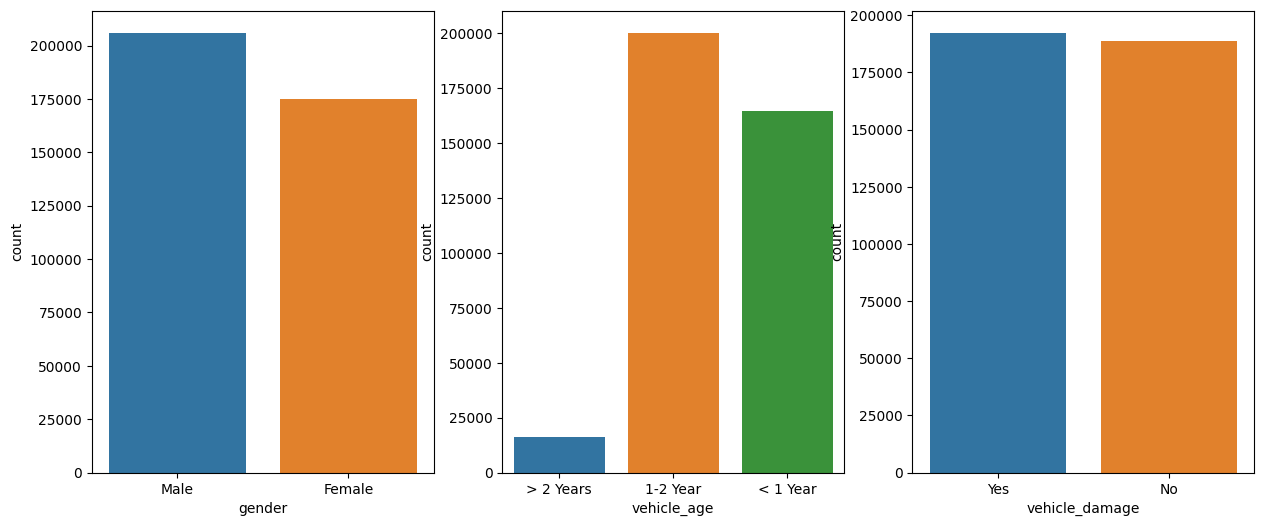

In [22]:
rcParams['figure.figsize'] = 15,6

plt.subplot(1,3,1);
sns.countplot(x='gender',data=df1);

plt.subplot(1,3,2);
sns.countplot(x='vehicle_age',data=df1);

plt.subplot(1,3,3);
sns.countplot(x='vehicle_damage',data=df1);

# **Step 2 Feature Engineering**

In [54]:
df2=df1.copy()

In [55]:
# vehicle age
df2['vehicle_age']=df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' 
                                            else 'between_1_2_years' if x == '1-2 Year'
                                            else 'below_1_year')

# vehicle damage
# df2['vehicle_damage']=df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

df2['previously_insured']=df2['previously_insured'].apply(lambda x: 'Yes' if x == 1 else 'No')

df2['driving_license']=df2['driving_license'].apply(lambda x: 'Yes' if x == 1 else 'No')

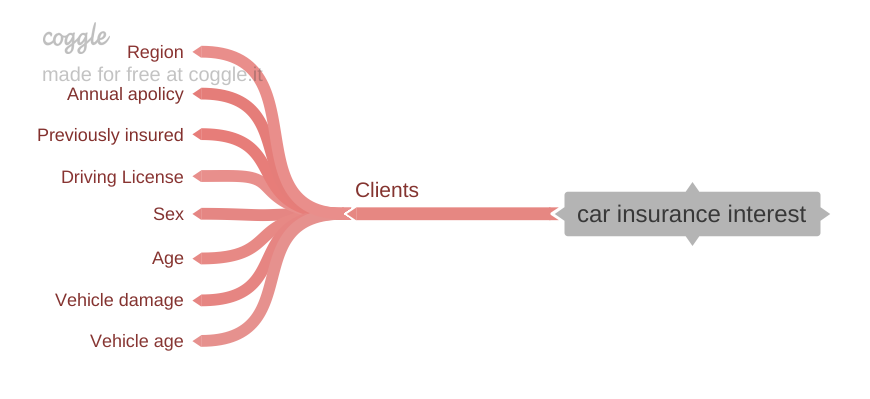

In [25]:
Image('../img/car_insurance_interest.png')

## **2.1 Hypothesis creation**

### **2.1.2 Clients**

**1** Quanto maior a apólice de saúde, maior a chance do interesse

**2** Se não tem seguro automotivo, maior chance de interesse

**3** Se tem carteira de motorista, maior chance de interesse

**4** Homens têm maior chance de se interessar

**5** Pessoas mais velhas têm mais chance de se interessar

**6** Proprietários de veículos mais novos têm maior chance de se interessar

**7** Pessoas que moram em regiões com mais acidentes e menos seguras têm mais chance de se interessar

**8** Pessoas há mais tempo associadas têm mais chance de se interessar

### **2.2 Feature engineering**

# **Step 3 Variable filtering**

In [57]:
df3=df2.copy()

## **3.1 Row filtering**

## **3.2 Column filtering**

In [27]:
# df3=df3.drop('id',axis=1)

# **Step 4 Exploratory data analysis**

In [58]:
df4=df3.copy()

## **4.1 Univariate analysis**

### **4.1.1 Response variable**

response
0    334399
1     46710
Name: count, dtype: int64

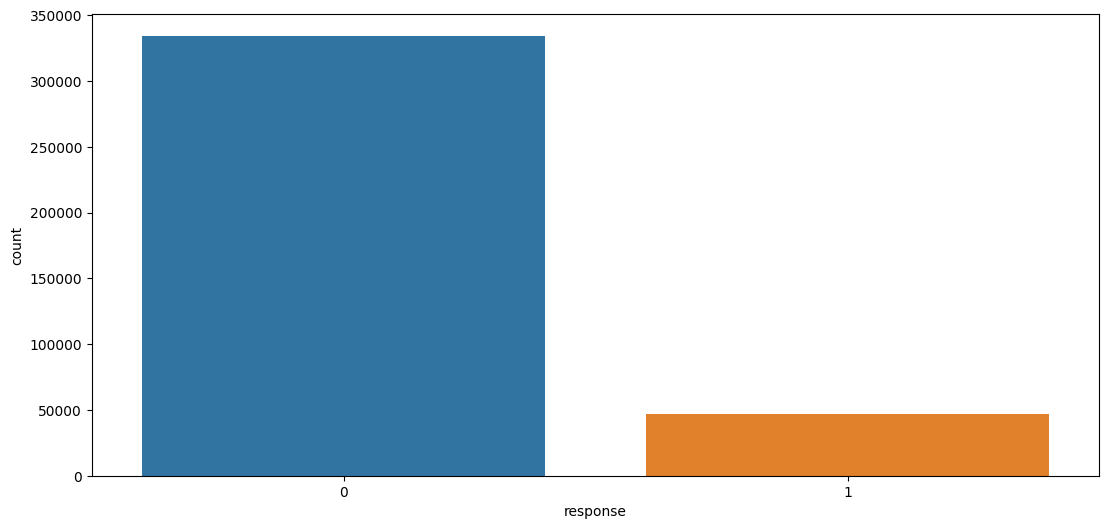

In [29]:
rcParams['figure.figsize'] = 13,6

sns.countplot(x='response',data=df4);
df4['response'].value_counts()

### **4.1.2 Numerical variables**

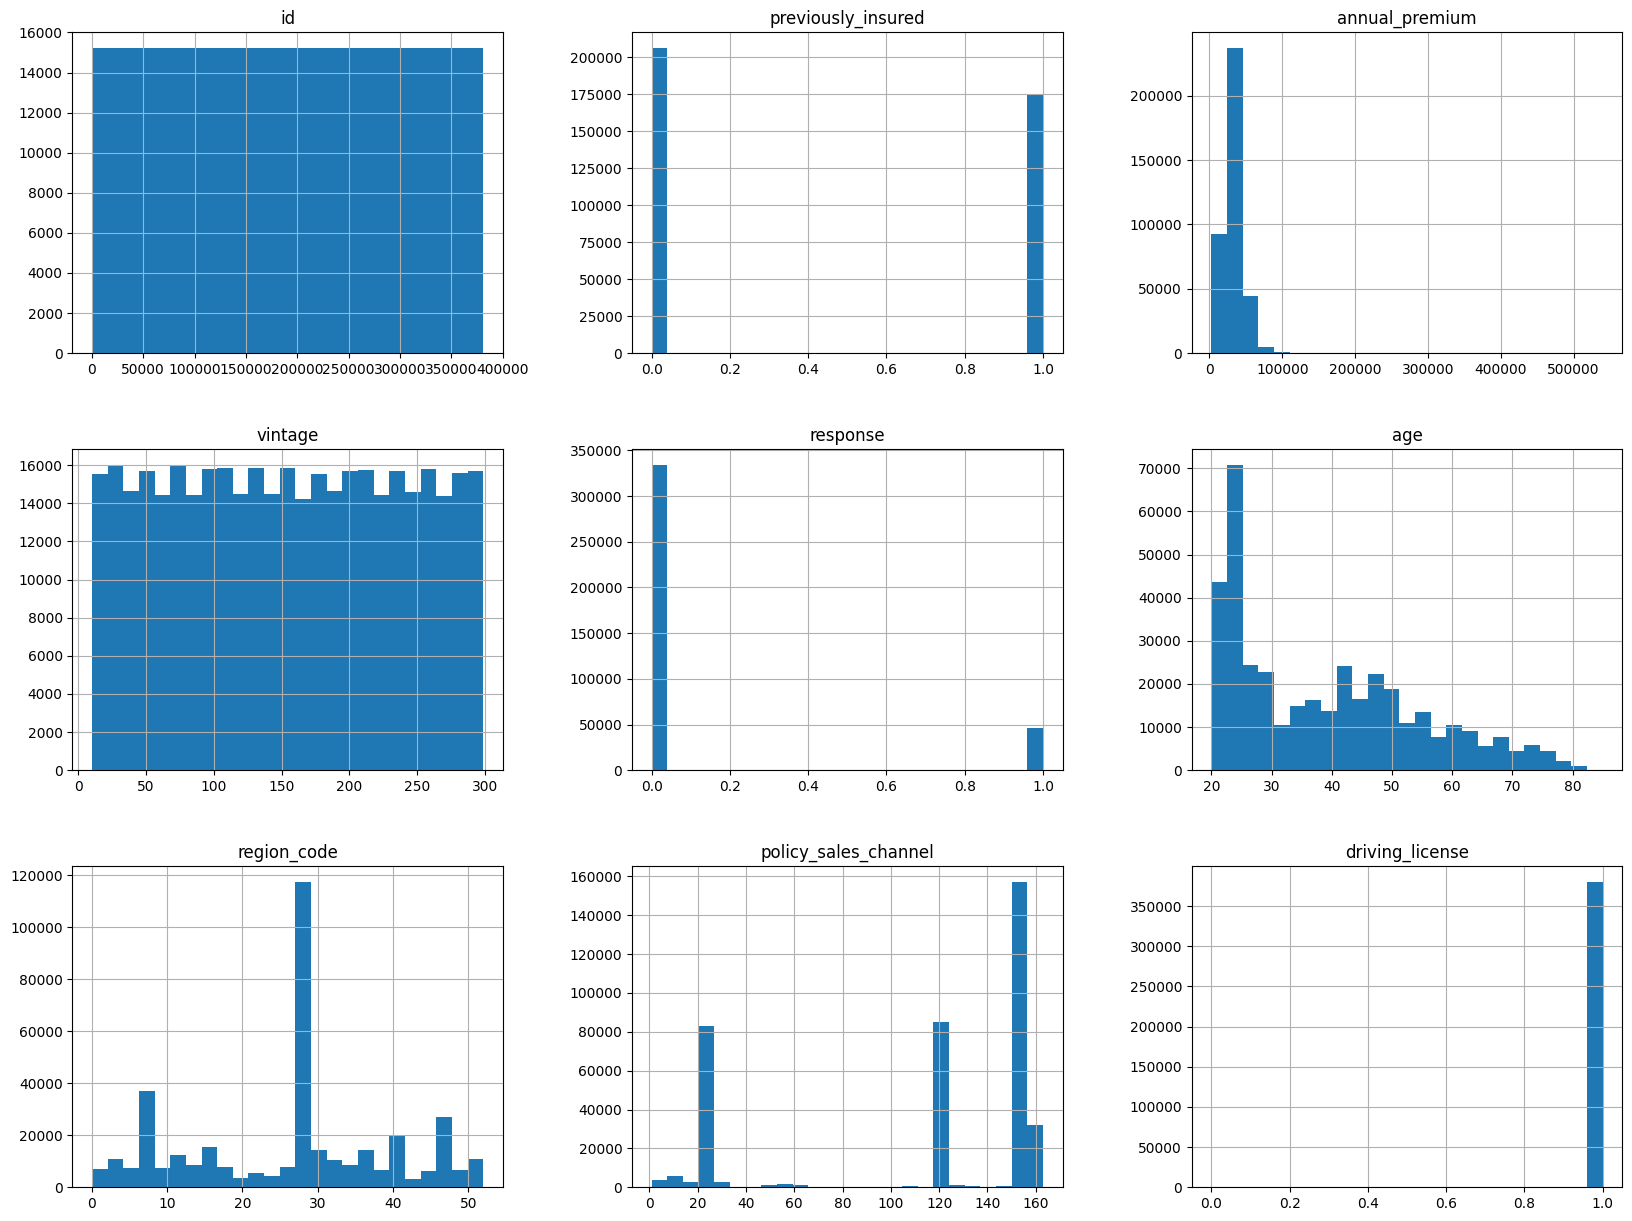

In [30]:
rcParams['figure.figsize'] = 20,15
num_attributes.hist(bins=25);

### **4.1.3 Categorical variables**

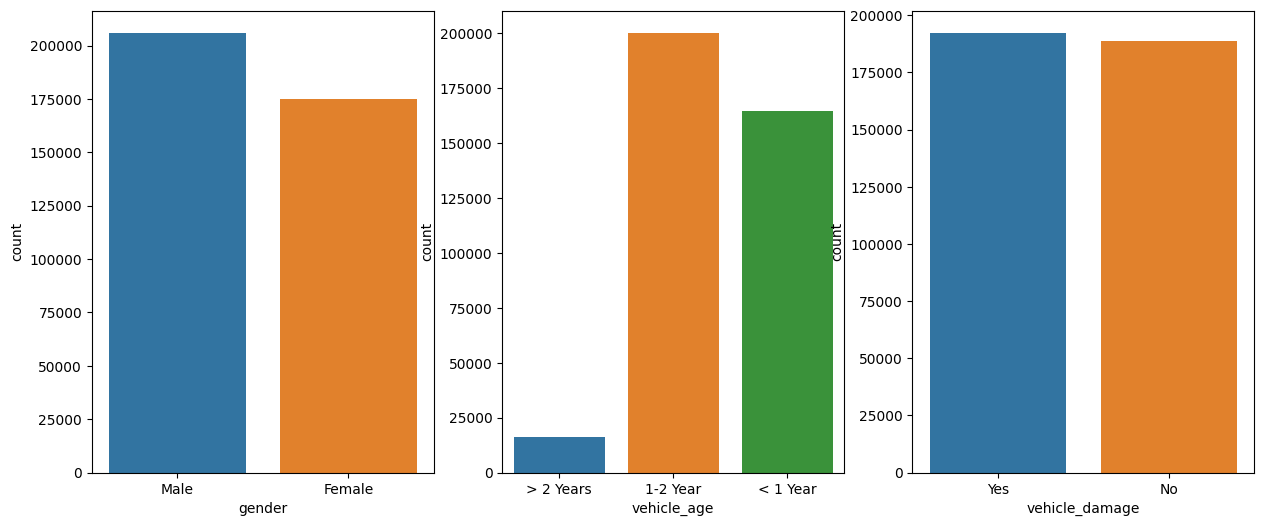

In [31]:
rcParams['figure.figsize'] = 15,6

plt.subplot(1,3,1);
sns.countplot(x='gender',data=df1);

plt.subplot(1,3,2);
sns.countplot(x='vehicle_age',data=df1);

plt.subplot(1,3,3);
sns.countplot(x='vehicle_damage',data=df1);

## **4.2 Bivariate analysis**


### **4.2.1 Annual_premium**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


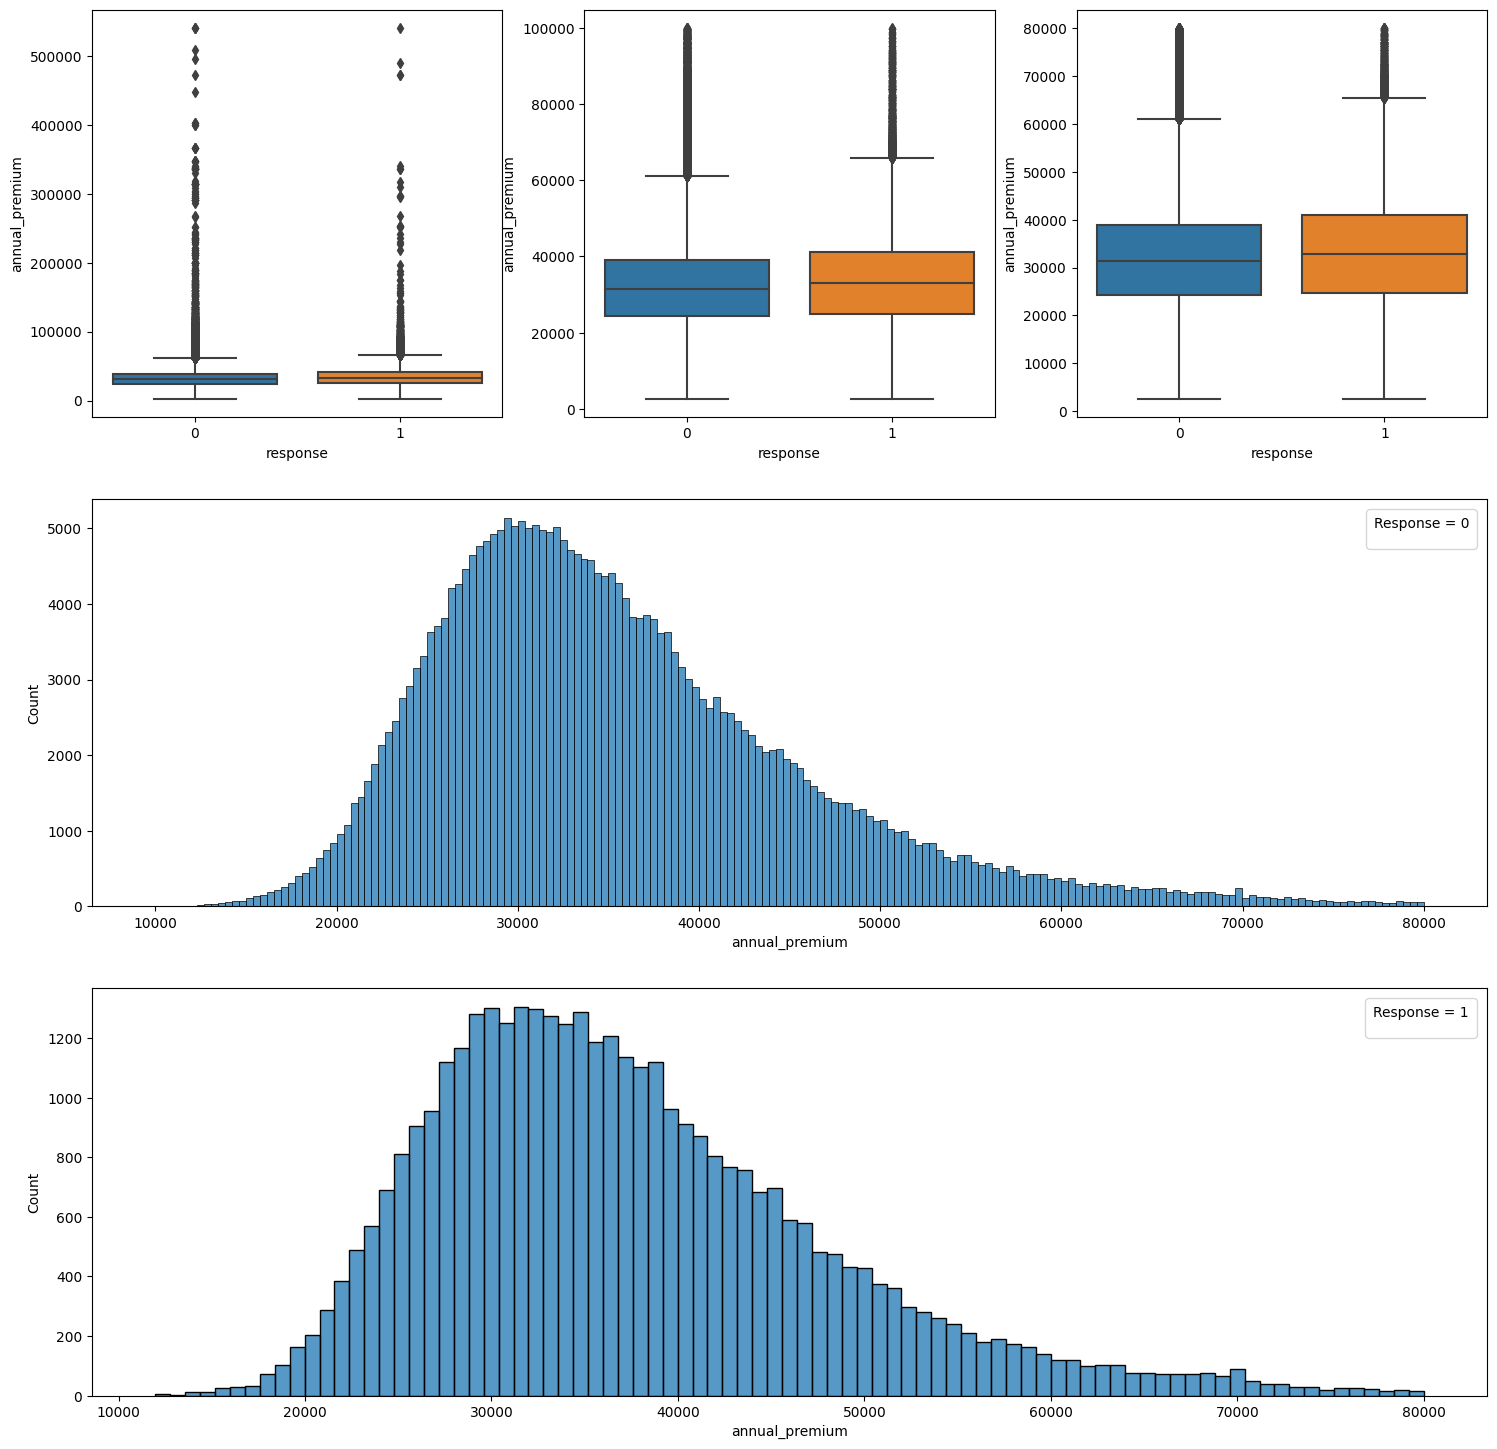

In [32]:
rcParams['figure.figsize'] = 18,18
grid=gridspec.GridSpec(3,3)


plt.subplot(grid[0,0])
sns.boxplot(x='response',y='annual_premium',data=df4); 

aux4=df4[df4['annual_premium'] < 100000]
plt.subplot(grid[0,1])
sns.boxplot(x='response',y='annual_premium',data=aux4);


aux4=df4[df4['annual_premium'] < 80000]
plt.subplot(grid[0,2])
sns.boxplot(x='response',y='annual_premium',data=aux4);


aux=df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)]
aux00=aux.loc[df4['response']==0,'annual_premium']     
plt.subplot(grid[1,:])

plt.legend(title='Response = 0', fontsize="x-large")
sns.histplot(aux00);

aux00=aux.loc[df4['response']==1,'annual_premium'] 
plt.subplot(grid[2,:])
plt.legend(title='Response = 1', fontsize="x-large")
sns.histplot(aux00);

### **4.2.2 Vintage**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


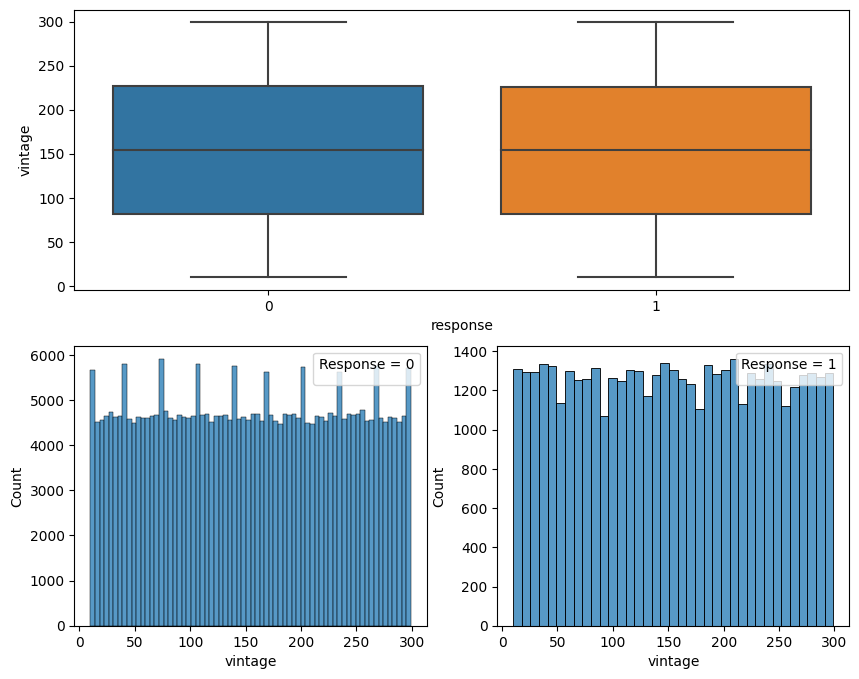

In [33]:
rcParams['figure.figsize'] = 10,8

grid=gridspec.GridSpec(2,2)

plt.subplot(grid[0,:])
sns.boxplot(x='response',y='vintage',data=df4);

plt.subplot(grid[1,0])
plt.legend(title='Response = 0')
sns.histplot(df4.loc[df4['response']==0,'vintage']);

plt.subplot(grid[1,1])
plt.legend(title='Response = 1')
sns.histplot(df4.loc[df4['response']==1,'vintage']);

### **4.2.3 Age**

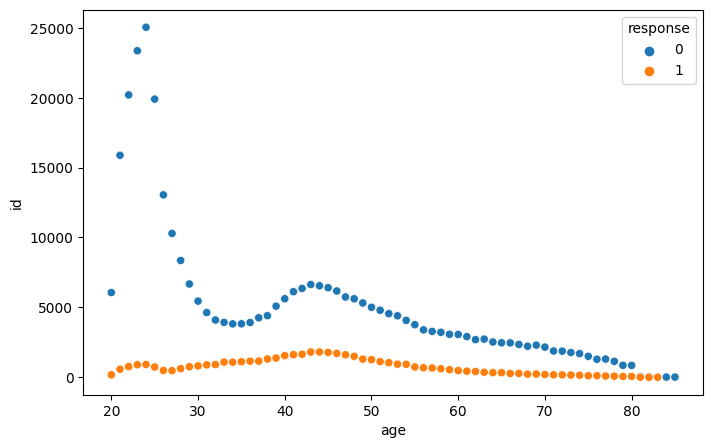

In [34]:
rcParams['figure.figsize'] = 8,5

aux=df4[['id','age','response']].groupby(['age','response']).count().reset_index()
sns.scatterplot(x='age',y='id',hue='response',data=aux);

### **4.2.4 Region_code**

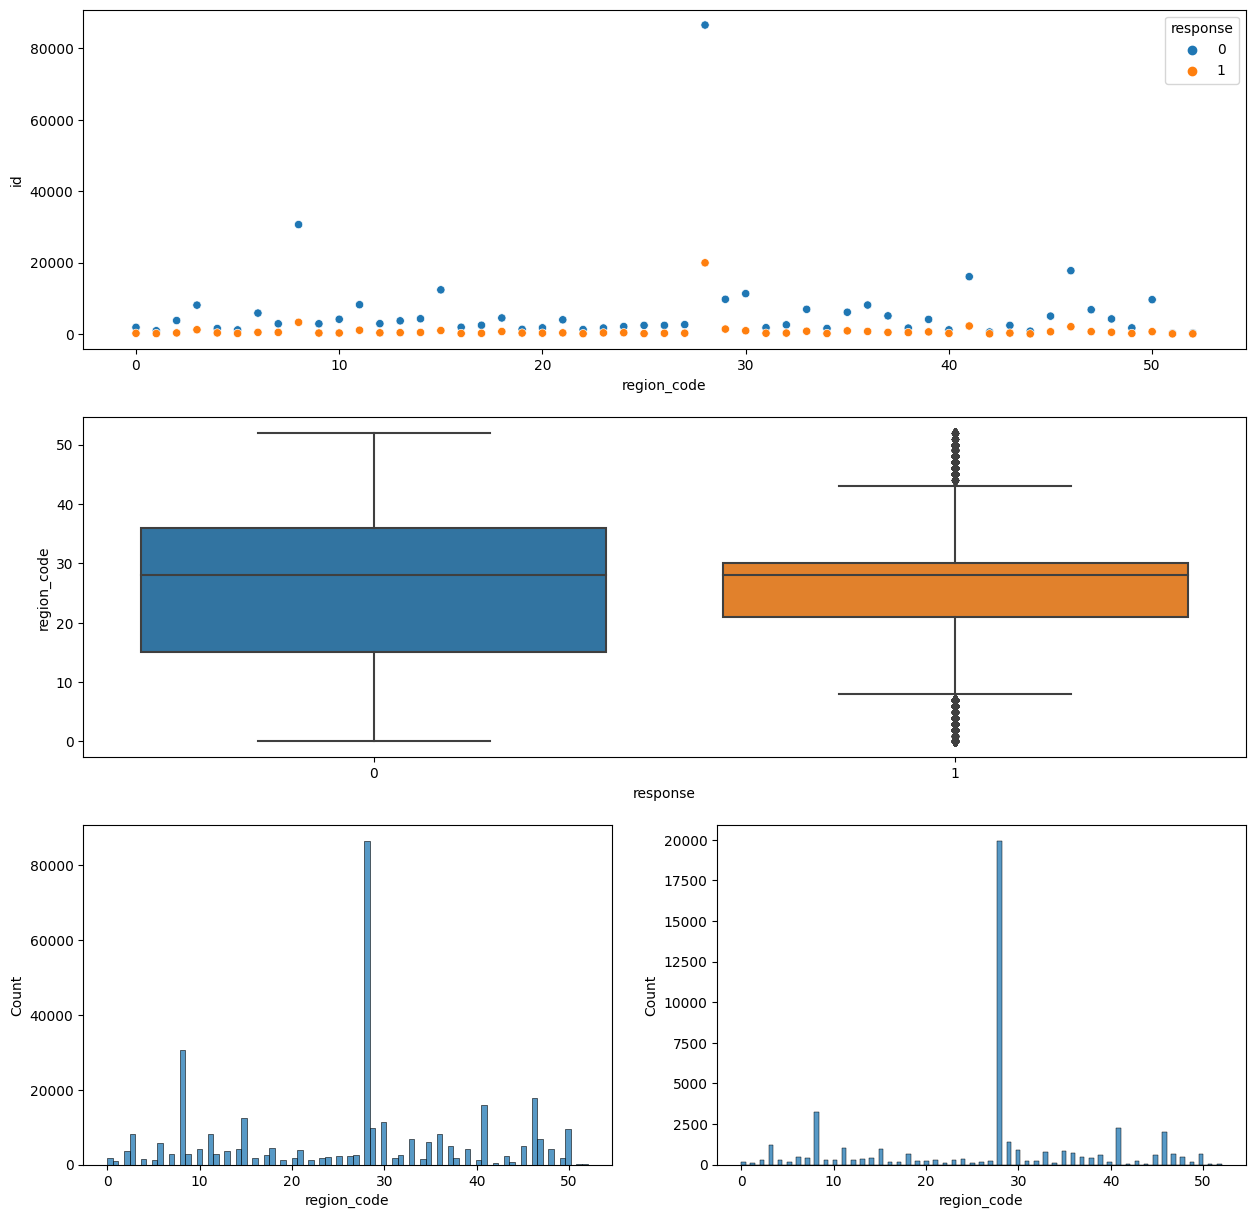

In [88]:
rcParams['figure.figsize'] = 15,15

grid=gridspec.GridSpec(3,2)

plt.subplot(grid[0,:])
aux0=df4[['id','region_code','response']].groupby(['region_code','response']).count().reset_index()
sns.scatterplot(x='region_code',y='id',hue='response',data=aux0);

plt.subplot(grid[1,:])
sns.boxplot(x='response',y='region_code',data=df4);   # olhar a mediana/quartis/medianas de cada um dos grupos em relação a idade
# 0 = 35 anos mediana, 1° ao 3° quartil : 25 a 50 anos


plt.subplot(grid[2,0])
aux00=df4.loc[df4['response']==0,'region_code']        # loc para passar a coluna como string
sns.histplot(aux00);


plt.subplot(grid[2,1])
aux00=df4.loc[df4['response']==1,'region_code']        
sns.histplot(aux00);

### **4.2.5 Policy_sales_channel**

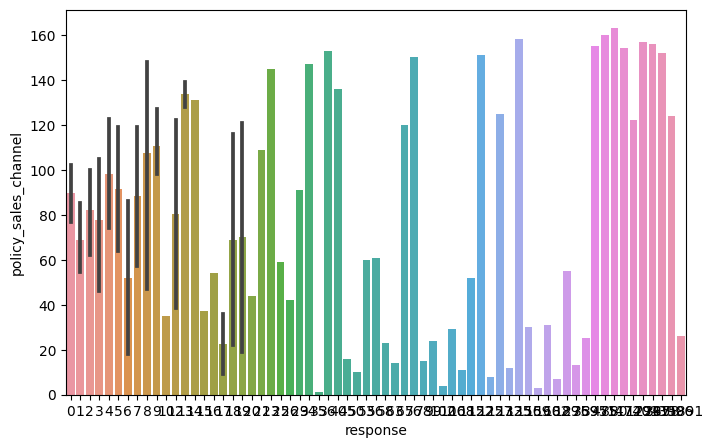

In [75]:
rcParams['figure.figsize'] = 8,5

aux=df4[['policy_sales_channel','response']].groupby(['policy_sales_channel']).sum().reset_index()
sns.barplot(x='response',y='policy_sales_channel',data=aux);

# fazer o stacked percentage plot

### **4.2.4 Vehicle_age**

In [ ]:
df4[['vehicle_age','response']].value_counts(normalize=True).reset_index()

In [ ]:
rcParams['figure.figsize'] = 15,8

crosstb=pd.crosstab(df4['vehicle_age'],df4['response'])
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

### **4.2.5 Vehicle_damage**

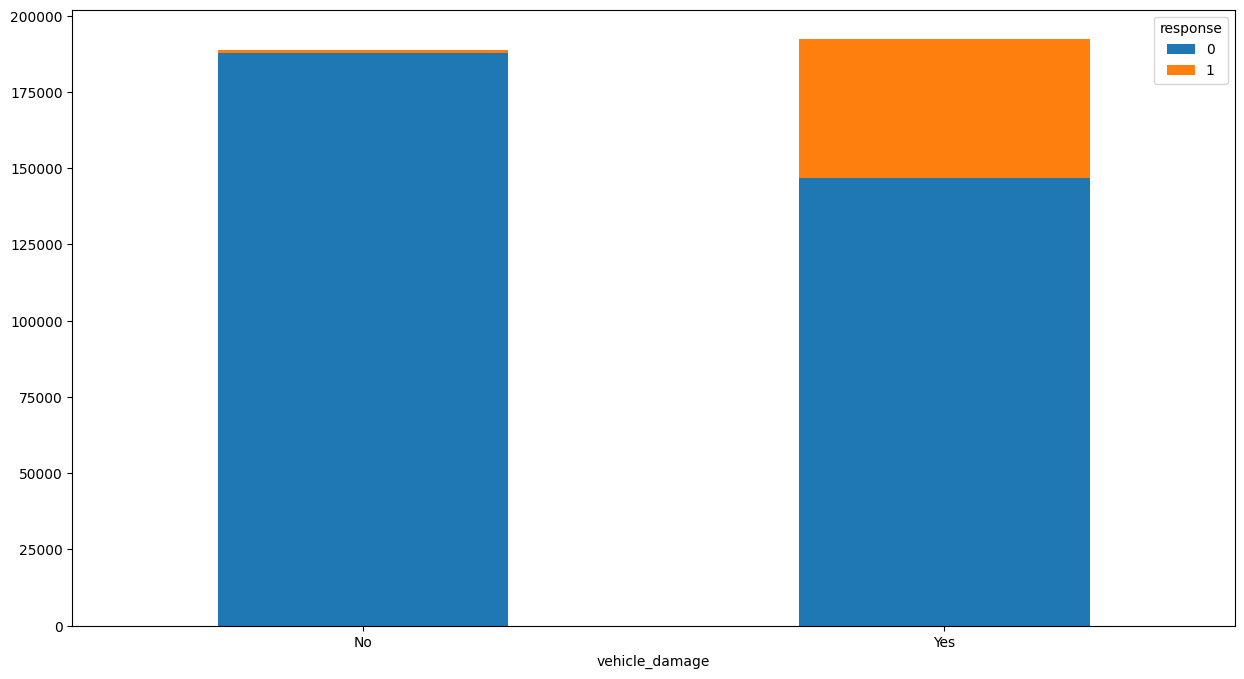

In [44]:
rcParams['figure.figsize'] = 15,8

crosstb=pd.crosstab(df4['vehicle_damage'],df4['response'])
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

### **4.2.6 Previously_insured**

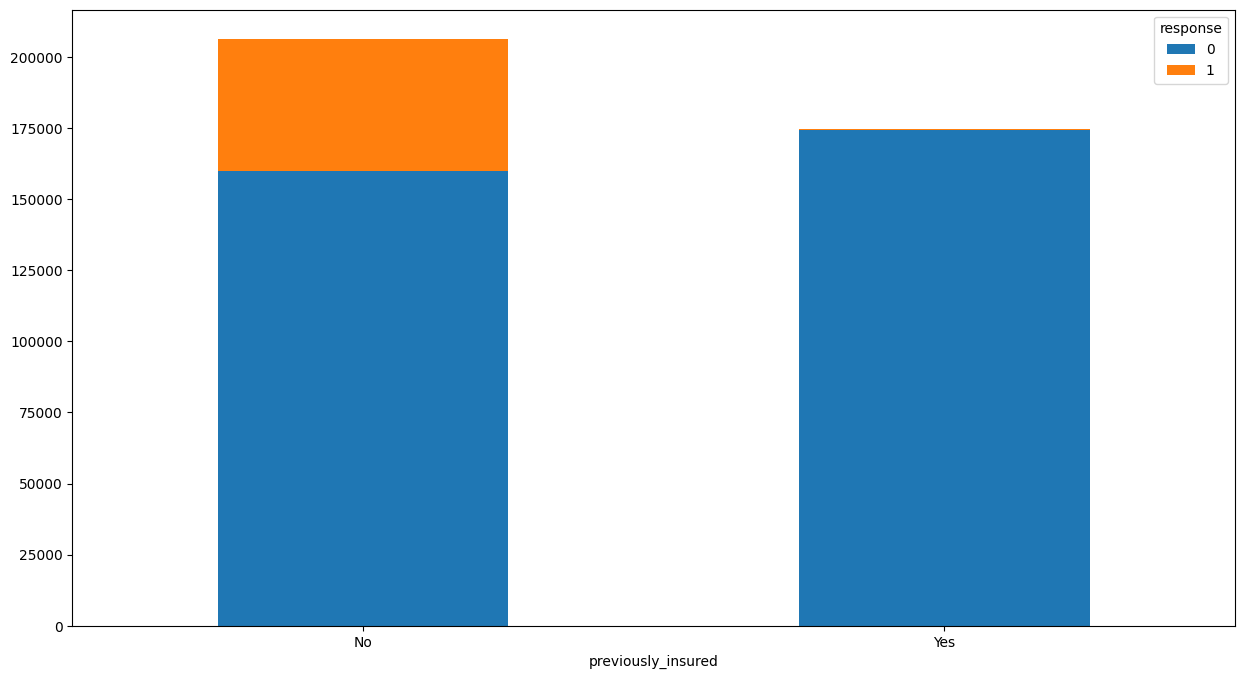

In [60]:
rcParams['figure.figsize'] = 15,8

crosstb=pd.crosstab(df4['previously_insured'],df4['response'])
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

In [69]:
# pode ser um 'vazamento de dados' , pq é muito relacionado com a variável resposta (100% das pessoas q já tem, não querem), é como se fosse um if/else para o modelo

# pd.crosstab(df4['previously_insured'],df4['response']),'\n'
# pd.crosstab(df4['previously_insured'],df4['response']).apply(lambda x: x /x.sum(), axis=1)

### **4.2.7 Driving_license**

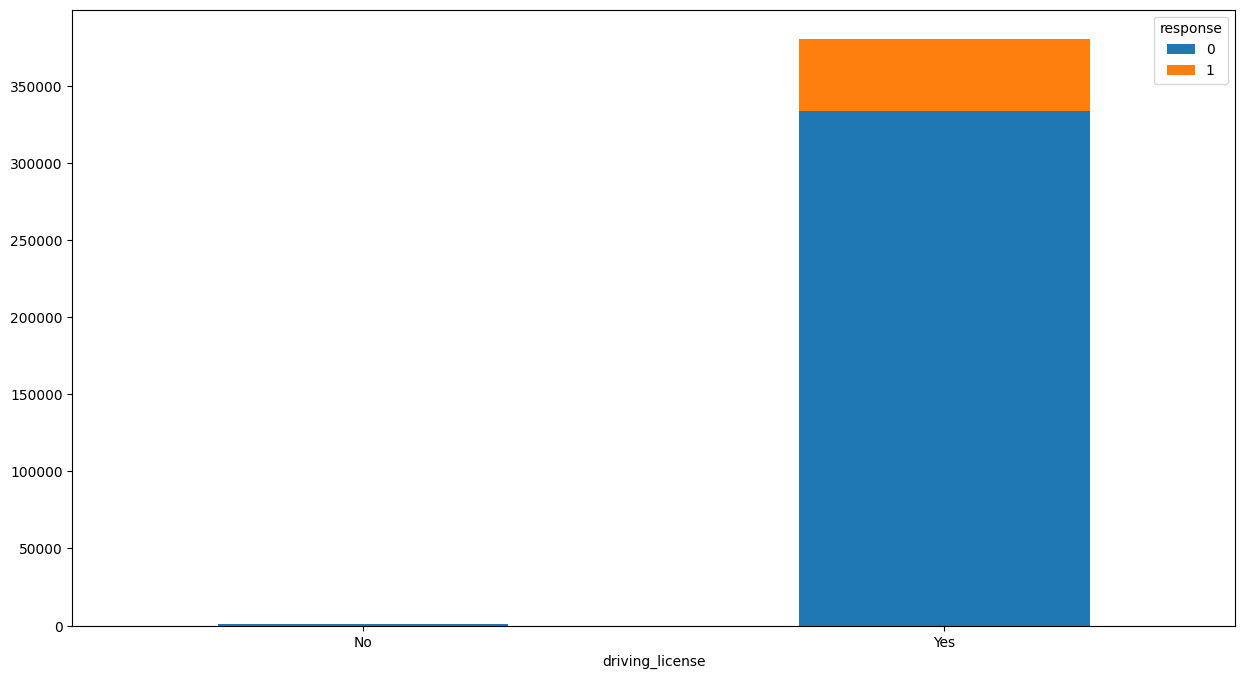

In [90]:
rcParams['figure.figsize'] = 15,8

crosstb=pd.crosstab(df4['driving_license'],df4['response'])
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

In [ ]:
# plt.subplot(1,2,1)
# sns.countplot(df4['driving_license'])
# plt.subplot(2,2,2)
# aux1 = df4[['driving_license', 'response']].groupby( 'driving_license' ).sum().sort_values('response',ascending=False).reset_index()
# sns.barplot( x='driving_license', y='response', data=aux1 );

In [74]:
# soma agregada
# aux=df4[['driving_license','response']].groupby('response').sum().reset_index()
# # sns.barplot(x='response',y='driving_license',data=aux);

# aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum()
# aux

# 87% das pessoas que dirigem não querem o seguro = a variável é discriminativa porém precisa de outra junto

In [ ]:
# print(pd.crosstab(df4['driving_license'],df4['response']),'\n')
# print(pd.crosstab(df4['driving_license'],df4['response']).apply(lambda x: x /x.sum(), axis=1))

### **0.0.0 hypos**

## **hypos**

**1** Quanto maior a apólice de saúde, maior a chance do interesse

**2** Se não tem seguro automotivo, maior chance de interesse

**3** Homens têm maior chance de se interessar

**4** Pessoas mais velhas têm mais chance de se interessar

**5** Proprietários de veículos mais novos têm maior chance de se interessar

**6** Pessoas que moram em regiões com mais acidentes e menos seguras têm mais chance de se interessar

**7** Pessoas há mais tempo associadas têm mais chance de se interessar

### **H1 Quanto maior a apólice de saúde, maior a chance do interesse**

    falso

In [30]:
# print(df4['annual_premium'].value_counts().head(5))
# aux1=df4[['annual_premium','response']].groupby('annual_premium').sum().sort_values('response',ascending=False).reset_index()
# print(aux1.head())

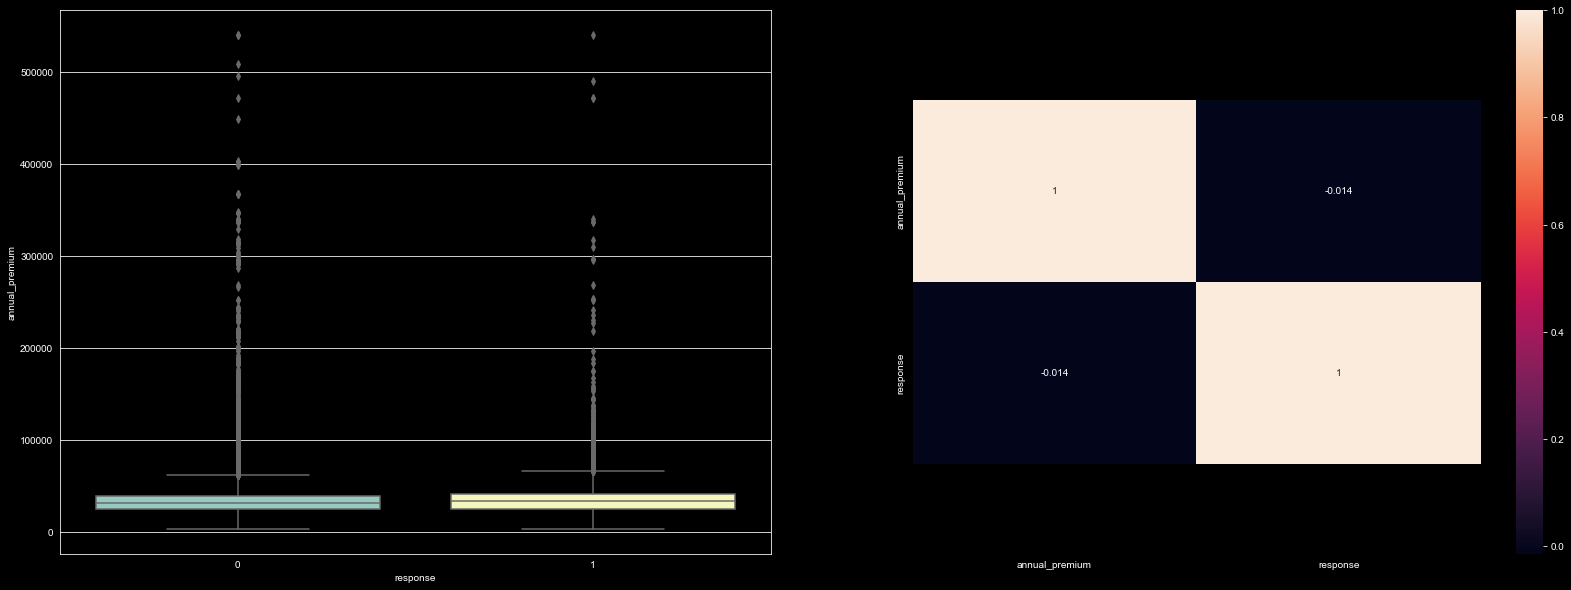

In [31]:
plt.subplot(1,2,1)
sns.boxplot(x='response',y='annual_premium',data=df4);

plt.subplot(1,2,2)
x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

### **H2 Se não tem seguro automotivo, maior chance de interesse**

    verdadeiro

In [32]:
aux2 = df4[['previously_insured', 'response']].groupby( 'previously_insured' ).sum().reset_index()
# aux2

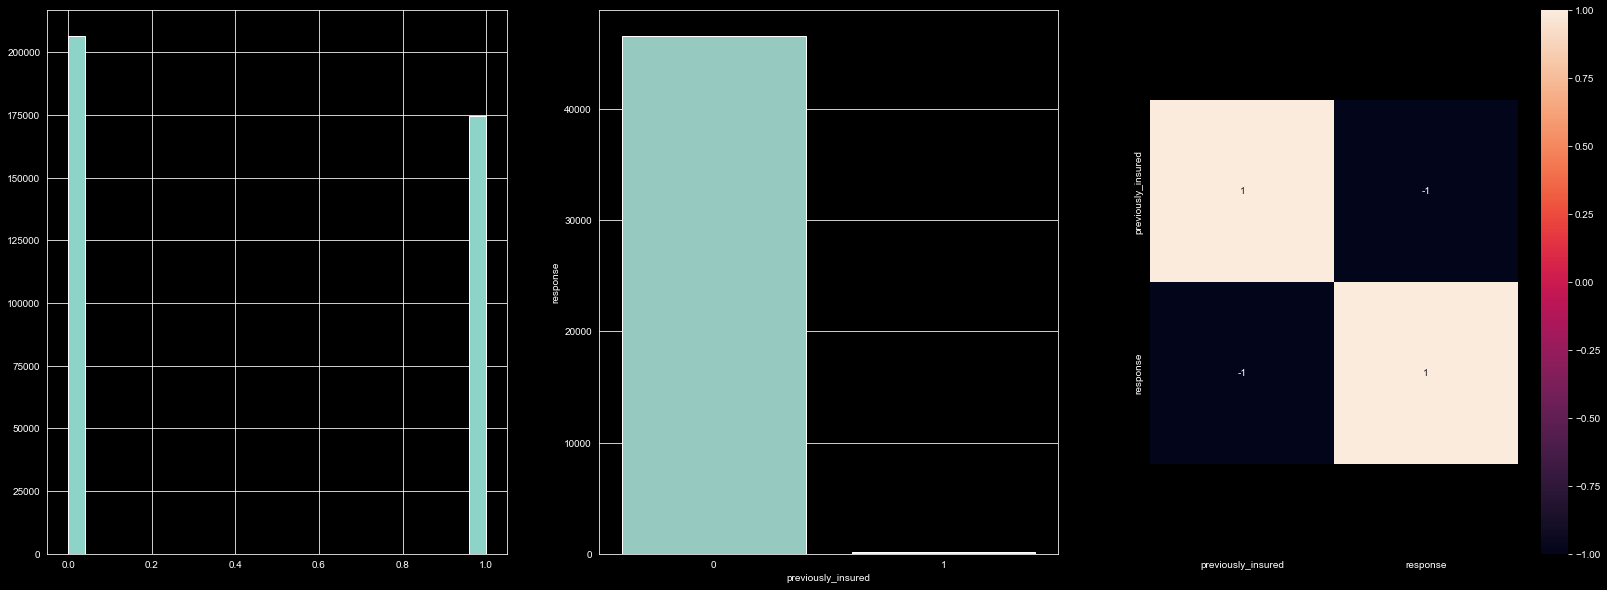

In [159]:
# plt.subplot( 1, 3, 1 )
# aux2.hist(bins=25);
# df4['previously_insured'].hist(bins=25);

plt.subplot( 1, 3, 1 )
df4['previously_insured'].hist(bins=25);

plt.subplot( 1, 3, 2 )
sns.barplot( x='previously_insured', y='response', data=aux2 );

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux2.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

### **H3 Homens têm maior chance de se interessar**

    verdadeiro

In [47]:
aux3 = df4[['gender', 'response']].groupby( 'gender' ).sum().reset_index()
aux3

,gender,response
0,Female,18185
1,Male,28525


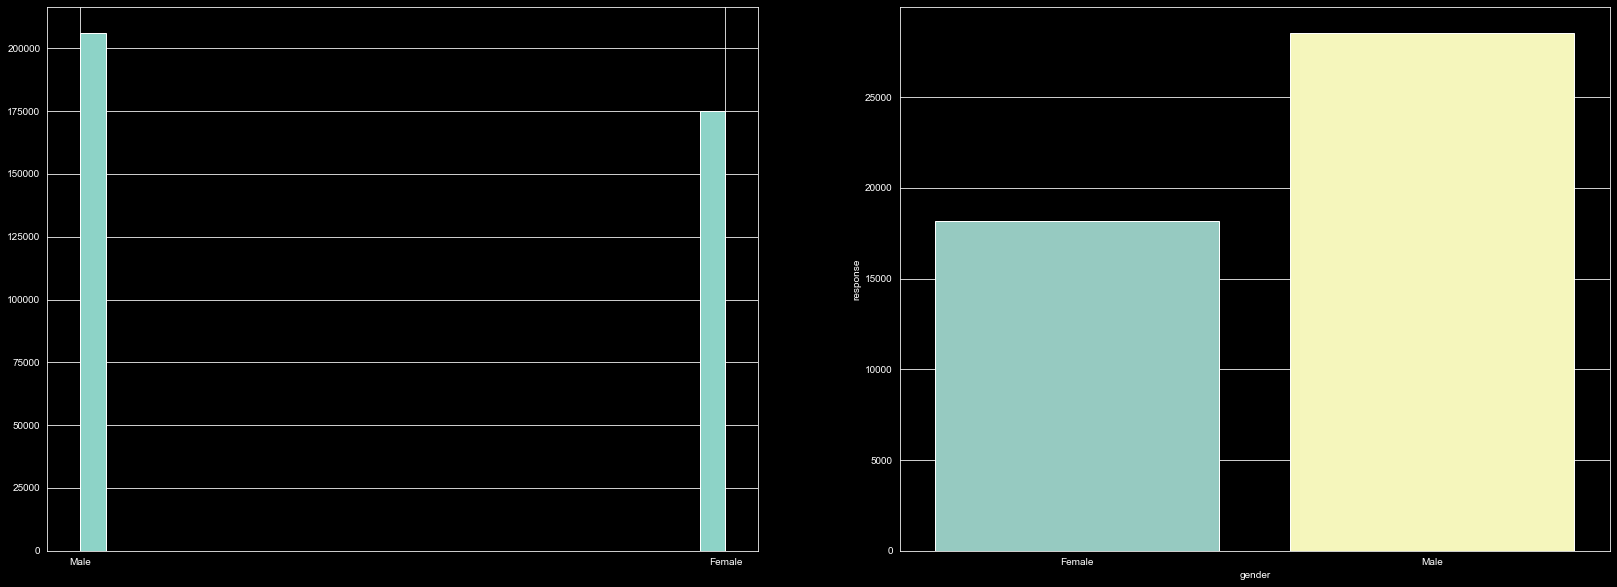

In [40]:
plt.subplot( 1, 2, 1 )
df4['gender'].hist(bins=25);


plt.subplot( 1, 2, 2 )
sns.barplot( x='gender', y='response', data=aux3 );


# plt.subplot( 1, 3, 3 )
# x = sns.heatmap( aux3.corr( method='pearson' ), annot=True );
# bottom, top = x.get_ylim()
# x.set_ylim( bottom+0.5, top-0.5 );

### **H4 Pessoas mais velhas têm mais chance de se interessar**


    verdadeiro

In [42]:
df4['age'].value_counts().head(20)
aux4=df4[['age','response']].groupby('age').sum().sort_values('response',ascending=False).reset_index()
aux4.head()

,age,response
0,44,1811
1,43,1805
2,45,1775
3,46,1707
4,42,1651


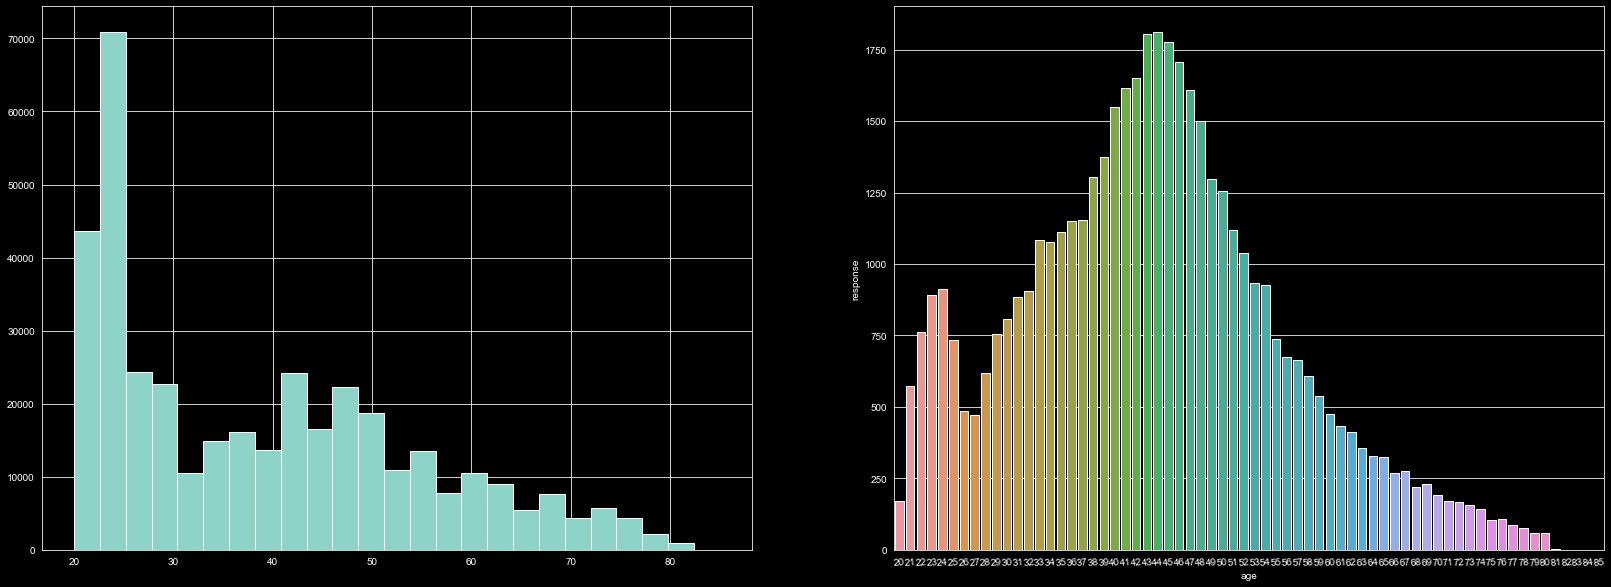

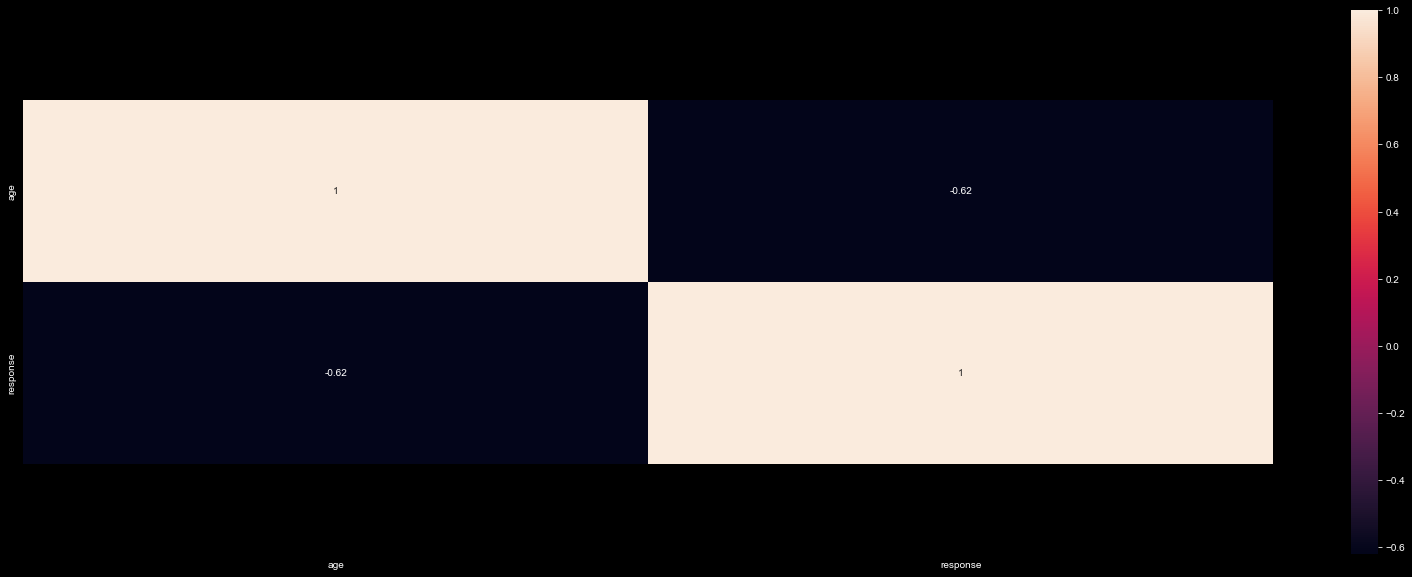

In [184]:
plt.subplot( 1, 2, 1 )
df4['age'].hist(bins=25);


plt.subplot( 1, 2, 2 )
sns.barplot( x='age', y='response', data=aux4 );
plt.xticks( rotation=5 )


plt.figure()
x = sns.heatmap( aux4.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

<AxesSubplot:xlabel='response', ylabel='age'>

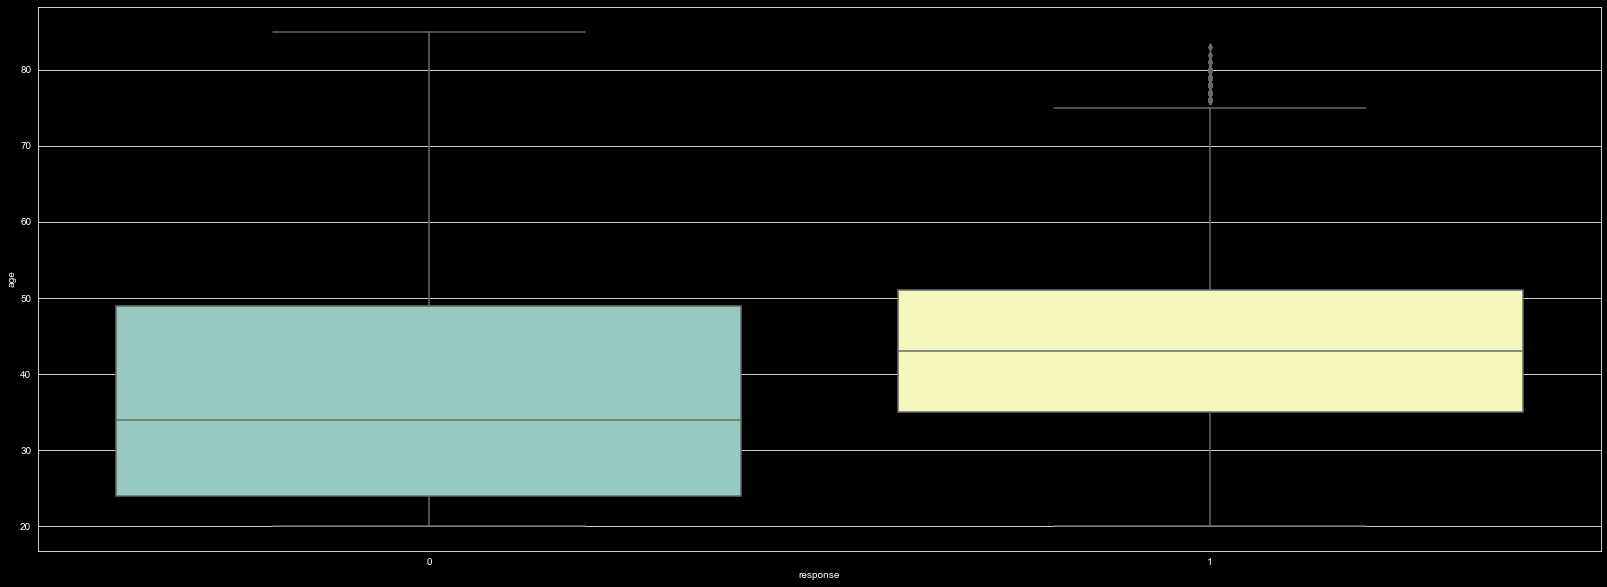

In [53]:
sns.boxplot(x='response',y='age',data=df4)

### **H5 Proprietários de veículos mais novos têm maior chance de se interessar**

In [60]:
df4['vehicle_age'].value_counts()
aux5=df4[['response','vehicle_age']].groupby('vehicle_age').sum().reset_index()
aux5

,vehicle_age,response
0,below_1_year,7202
1,between_1_2_years,34806
2,over_2_years,4702


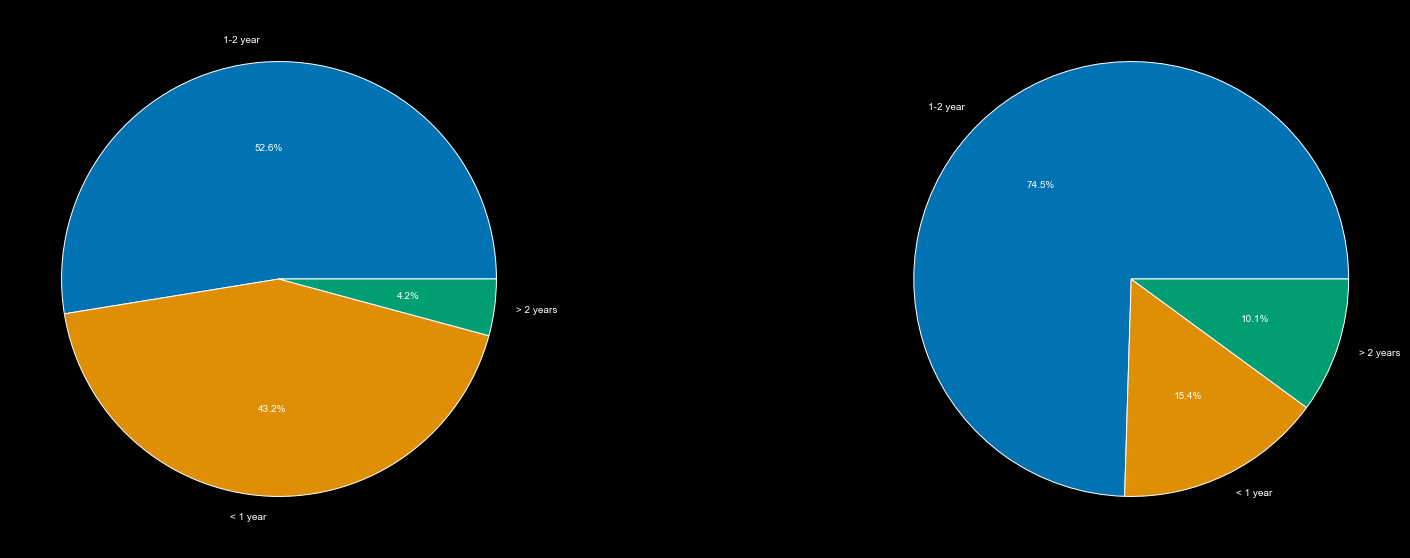

In [68]:
fig, (ax1,ax2) = plt.subplots(1,2)
labels = '1-2 year', '< 1 year', '> 2 years'
sizes = [200316, 164786, 16007]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors);


labels = '1-2 year', '< 1 year', '> 2 years'
sizes = [34806, 7202, 4702]
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors);


# plt.tight_layout()

### **H6 Pessoas que moram em regiões com mais acidentes e menos seguras têm mais chance de se interessar**

    falso

In [75]:
df4['region_code'].value_counts().head(10)

28    106415
8      33877
46     19749
41     18263
15     13308
30     12191
29     11065
50     10243
3       9251
11      9232
Name: region_code, dtype: int64

In [80]:
aux6=df4[['response','region_code']].groupby('region_code').sum().sort_values('response',ascending=False).reset_index()
aux6.head(10)

,region_code,response
0,28,19917
1,8,3257
2,41,2224
3,46,2032
4,29,1365
5,3,1181
6,11,1041
7,15,958
8,30,900
9,35,865


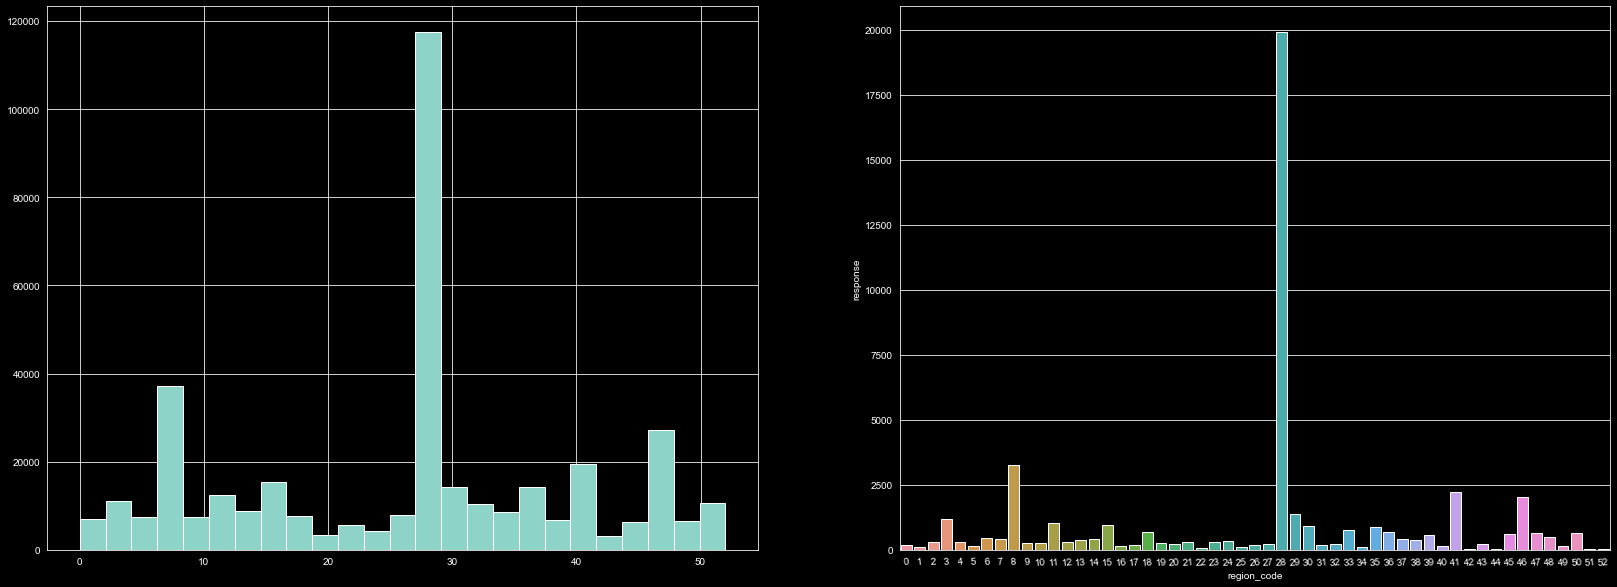

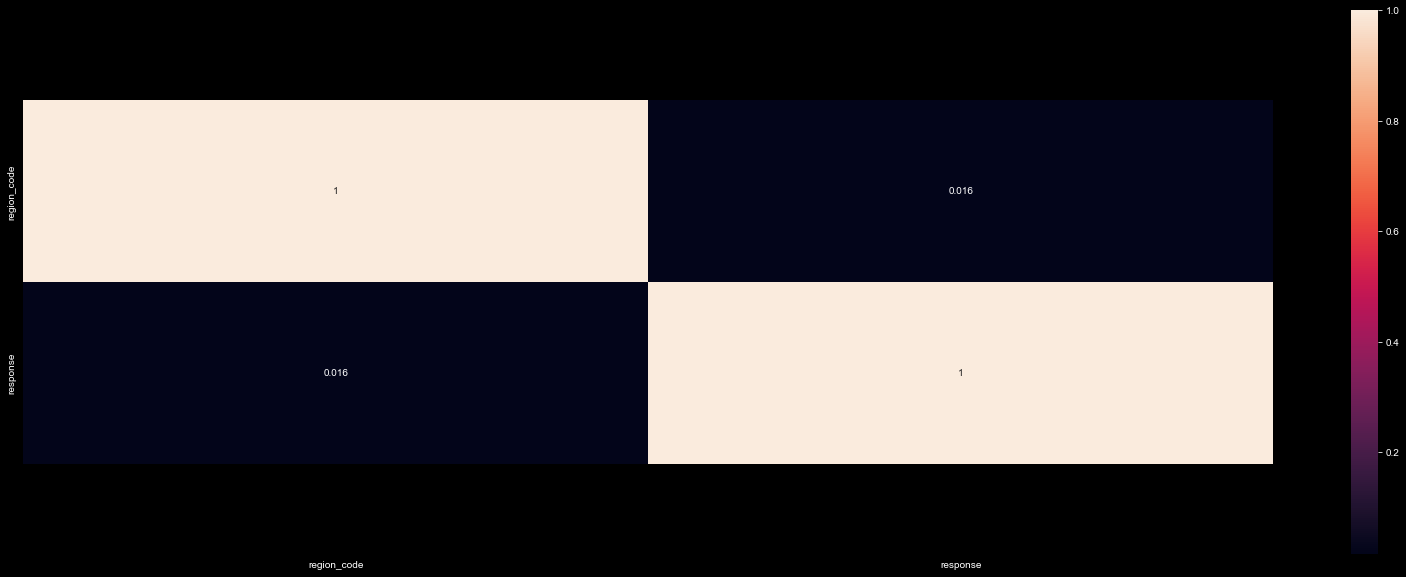

In [83]:
plt.subplot( 1, 2, 1 )
df4['region_code'].hist(bins=25);

plt.subplot( 1, 2, 2 )
sns.barplot( x='region_code', y='response', data=aux6 );
plt.xticks( rotation=5 );

plt.figure()
x = sns.heatmap( aux6.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

### **H7 Pessoas há mais tempo associadas têm mais chance de se interessar**

    falsa

In [63]:
# df4['vintage'].value_counts().head(10)

In [62]:
aux7=df4[['response','vintage']].groupby('vintage').sum().sort_values('response',ascending=False).reset_index()
# aux7.head(10)

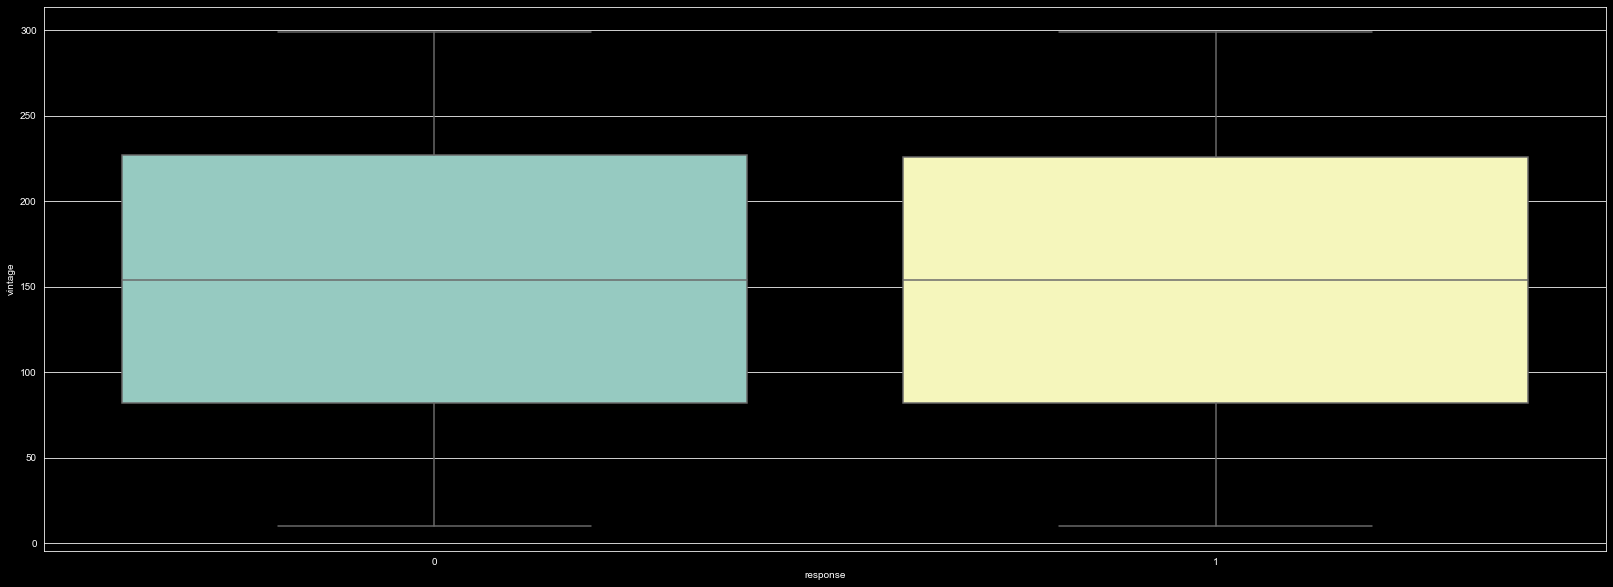

In [65]:
sns.boxplot(x='response',y='vintage',data=df4);

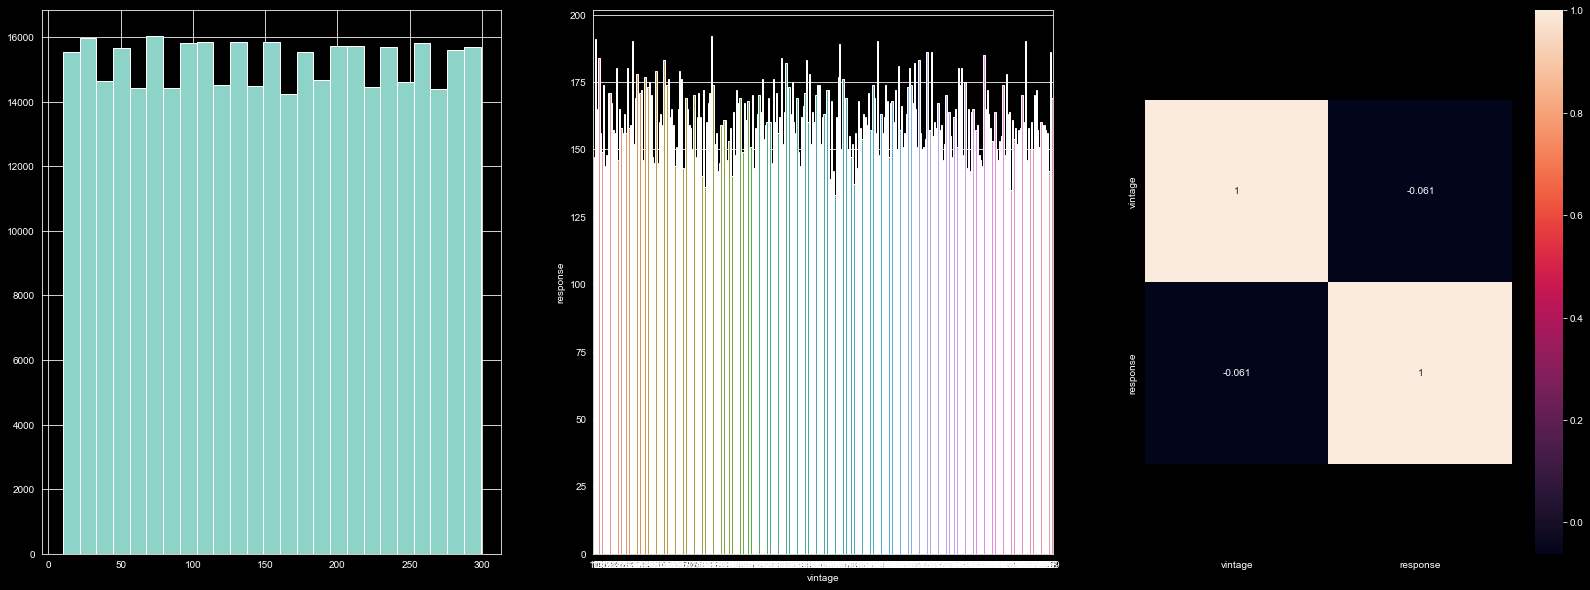

In [87]:
plt.subplot( 1, 3, 1 )
df4['vintage'].hist(bins=25);

plt.subplot( 1, 3, 2 )
sns.barplot( x='vintage', y='response', data=aux7 );

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux7.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

### **4.2.1 Resumo das hipóteses**

## **4.3 Multivariate analysis**

### **4.3.1 Numerical attributes**

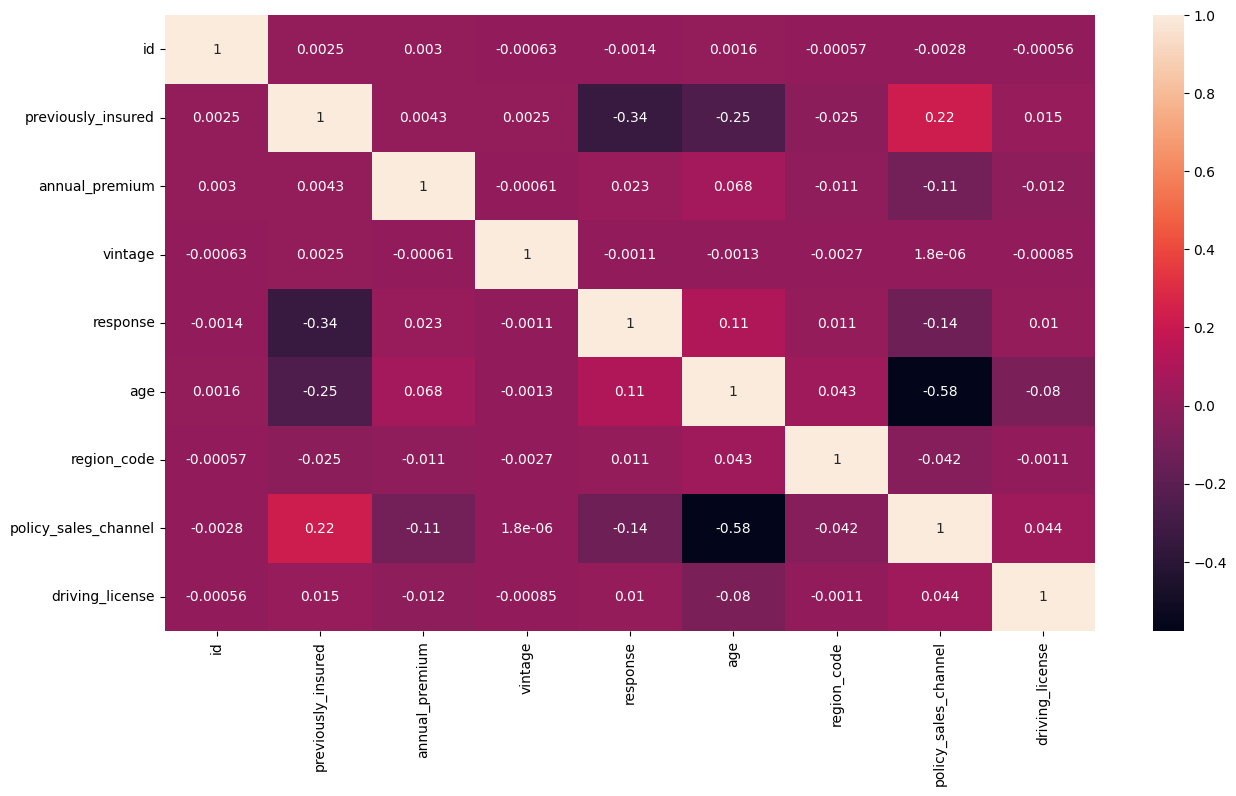

In [128]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

### **4.3.2 Categorical attributes**

In [137]:
df4

,id,previously_insured,annual_premium,vintage,response,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage
0,1,0,40454.0,217,1,Male,44,28,26,1,over_2_years,1
1,2,0,33536.0,183,0,Male,76,3,26,1,between_1_2_years,0
2,3,0,38294.0,27,1,Male,47,28,26,1,over_2_years,1
3,4,1,28619.0,203,0,Male,21,11,152,1,below_1_year,0
4,5,1,27496.0,39,0,Female,29,41,152,1,below_1_year,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,30170.0,88,0,Male,74,26,26,1,between_1_2_years,0
381105,381106,1,40016.0,131,0,Male,30,37,152,1,below_1_year,0
381106,381107,1,35118.0,161,0,Male,21,30,160,1,below_1_year,0
381107,381108,0,44617.0,74,0,Female,68,14,124,1,over_2_years,1


In [135]:
# only categorical data
a = df4.select_dtypes( include='object' )

# Calculate cramer V
a1 = cramer_v( a['gender'], a['gender'] )
a2 = cramer_v( a['gender'], a['vehicle_age'] )
a3 = cramer_v( a['gender'], a['vehicle_damage'] )

a4 = cramer_v( a['vehicle_age'], a['gender'] )
a5 = cramer_v( a['vehicle_age'], a['vehicle_age'] )
a6 = cramer_v( a['vehicle_age'], a['vehicle_damage'] )

a7 = cramer_v( a['vehicle_damage'], a['gender'] )
a8 = cramer_v( a['vehicle_damage'], a['vehicle_age'] )
a9 = cramer_v( a['vehicle_damage'], a['vehicle_damage'] )

# Final dataset
d = pd.DataFrame( {'gender': [a1, a2, a3], 
                   'vehicle_age': [a4, a5, a6],
                   'vehicle_damage': [a7, a8, a9]  })

d = d.set_index( d.columns )

sns.heatmap( df4, annot=True );

KeyError: 'vehicle_damage'

# **Passo 5 Data preparation**

In [25]:
df5=df4.copy()

In [26]:
# encontrar o poder de generalização pq vai usar dados q o modelo nunca viu

X=df5.drop('response',axis=1)
y=df5['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split(X,y,test_size=0.20)

df5=pd.concat ([x_train, y_train], axis=1) # se torna o dataset de treino

## **5.1 Standardization**

    subtrair a média e dividir pelo desvio padrão

### **annual_premium**

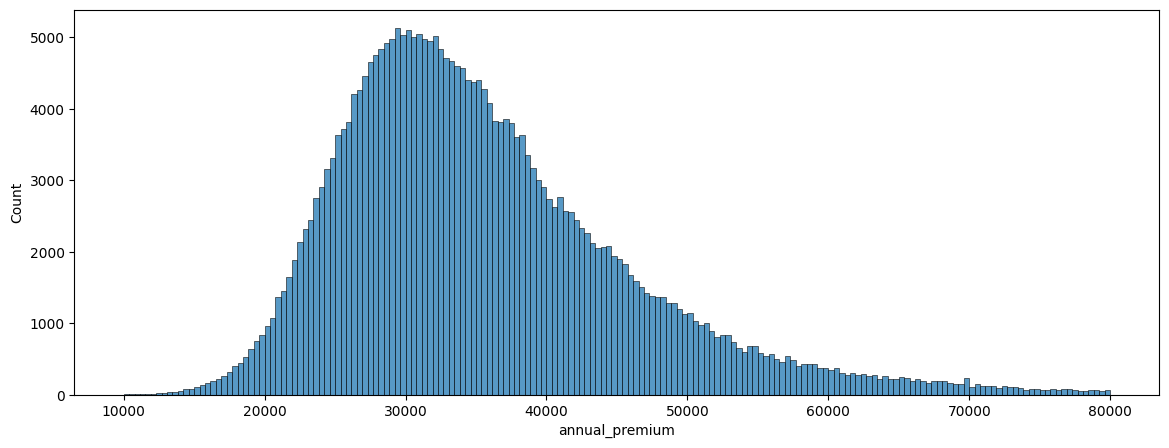

In [106]:
# possue uma distribuição normal sem os outliers
# o correto seria tratar os outliers para fazer a standardization, mas por faltar clareza e ser o primeiro ciclo, deixar assim

rcParams['figure.figsize'] = 14,5
aux=df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)]
aux00=aux.loc[df4['response']==0,'annual_premium']        
sns.histplot(aux00);

In [13]:
ss=pp.StandardScaler()
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values) # duplo colchetes p/ pegar o array -sempre passar como array nos encoders

## **5.2 Rescaling**

### **age**

<AxesSubplot:xlabel='age', ylabel='Count'>

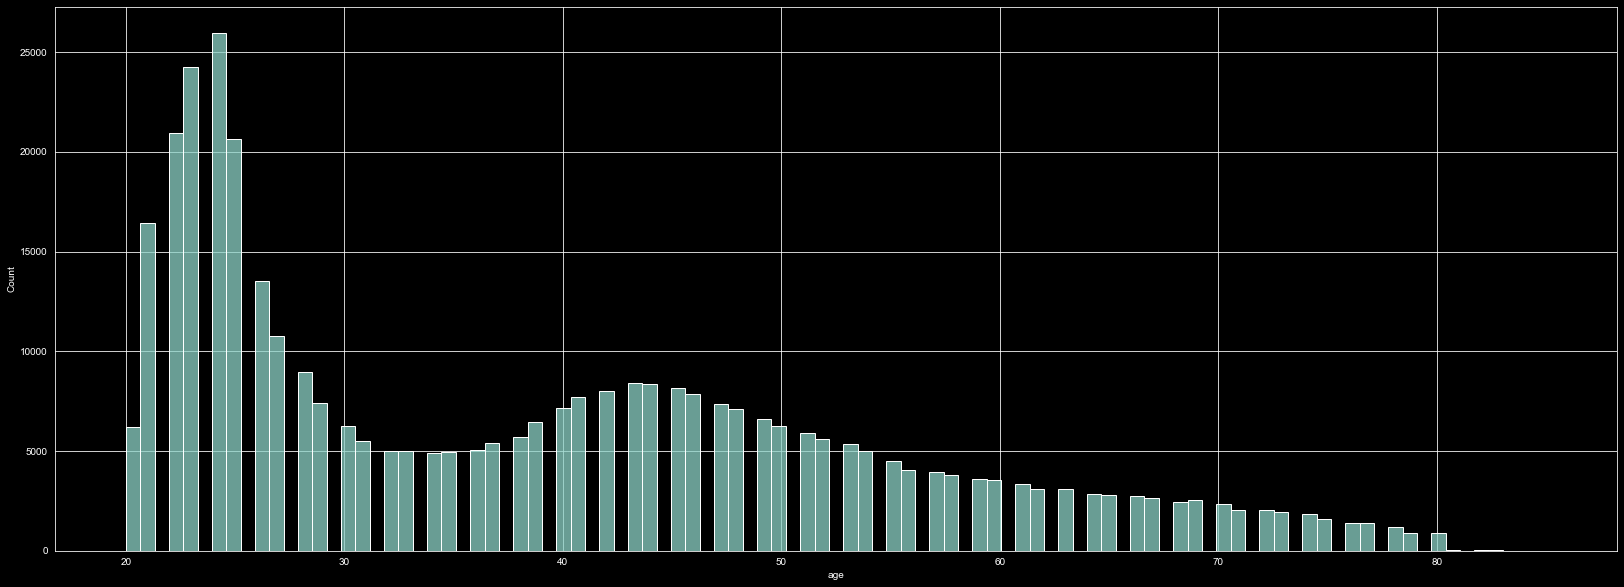

In [5]:
sns.histplot(df5['age']) # plota a predominância ( 25 mil exemplos [não interessados])

# não é próxima de uma normal, por isso rescaling

In [27]:
mms_age=pp.MinMaxScaler()

df5['age']=mms_age.fit_transform(df5[['age']].values)

### **vintage**

In [7]:
# não possue distribuição 

In [28]:
mms_vintage=pp.MinMaxScaler()
df5['vintage']=mms_vintage.fit_transform(df5[['vintage']].values)

## **5.3 Encoder**

### **gender**

In [29]:
# one hot encoding/target encoding

# target_encode_gender=df5.groupby('gender')['response'].mean()
# df5.loc[:,'gender']=df5['gender'].map(target_encode_gender)

df5=pd.get_dummies(df5,prefix='gender',columns=['gender'])

### **region_code**

In [16]:
df5['region_code'].unique()

array([10., 28., 33., 46., 14., 11., 36., 47., 29., 50.,  3., 30., 21.,
        6., 20., 41.,  8., 12., 45., 13., 18., 16.,  1., 15., 35., 25.,
       23., 37., 17., 32., 48., 39.,  0., 19., 44., 26., 34.,  9., 22.,
       43.,  2., 27.,  7., 38., 24.,  4.,  5., 42., 31., 51., 40., 52.,
       49.])

In [30]:
#  frequency encoding / target encoding / weighted target encoding

# para variáveis categórias com muitos níveis (acima de 6 ou 7) não usar one hot encoding para não aumentar muito a dimensionalidade
# dica do meigarom é usar target encoding
# target encoding = mean encoding

target_encode_region_code=df5.groupby('region_code')['response'].mean()
df5.loc[:,'region_code']=df5['region_code'].map(target_encode_region_code)  # mapear a representatividade em termos de frequência

### **vehicle_age**

In [17]:
df5['vehicle_age'].unique()

array(['below_1_year', 'between_1_2_years', 'over_2_years'], dtype=object)

In [31]:
# pode usar order encoding/one hot encoding/frequency encoding, correndo o risco de desconsiderar carros com 2 meses ou 15 meses por exemplo
# get dummies do pandas = one hot encoding, dummies é melhor por já entregar as colunas mapeadas

df5=pd.get_dummies(df5,prefix='vehicle_age',columns=['vehicle_age'])

### **policy_sales_channel**

In [32]:
df5.groupby('policy_sales_channel').size().head(5)   # só pra entender o .size 

policy_sales_channel
1.0    859
2.0      3
3.0    418
4.0    430
6.0      3
dtype: int64

In [21]:
df5['policy_sales_channel'].unique()

array([152., 124.,  26., 163., 156., 160.,   4., 157., 151., 150., 155.,
        55., 122.,  29.,  31.,   1., 154.,  15.,  25., 140.,  14.,  24.,
         7.,  52., 120.,  11., 103.,  30.,  13., 121.,   8.,   9.,  91.,
        66.,  64.,  22., 125.,  60.,  23., 113., 119., 147., 109., 158.,
        54.,  45., 128.,  44., 131.,  12.,  61., 159.,  16.,  98., 136.,
       118.,  19.,  73.,   3.,  59.,  65., 153.,  21., 106.,   2., 116.,
       146., 139., 129.,  42., 138.,  10., 111.,  86., 135.,  47.,  93.,
        37., 132., 145., 127., 133.,  97.,  18., 130., 100.,  67.,  48.,
        39.,  76., 148.,  83.,  56.,  57.,  36., 134.,  90.,  92.,  81.,
        63., 114.,  49.,  35.,  96.,  51., 107.,  88.,  20.,  53., 104.,
        75.,  82.,  89., 102.,  32.,  78.,  94., 115., 117., 143., 110.,
        74.,  46., 108.,  33., 101.,  80.,  79.,  99.,  34.,  71.,  17.,
        28.,  40., 137.,  69., 126., 105.,  58.,  38.,  27.,  95.,  87.,
        62.,  70.,  50.,  68.,   6.,  84., 123.,  4

In [33]:
# target encoding/frequency encoding

fe_policy_sales_channel=df5.groupby('policy_sales_channel').size()/len(df5)  # (quantos exemplos por agrupamento e dividir pelo dataset inteiro p/atribuir o peso dessa variávael
# em relação à base inteira)
df5.loc[:,'policy_sales_channel']=df5['policy_sales_channel'].map(fe_policy_sales_channel)

## **5.4 Validation(teste) preparation**

In [34]:
# annual_premium
x_validation.loc[:,'annual_premium']=ss.transform(x_validation[['annual_premium']].values)


# age
x_validation.loc[:,'age']=mms_age.transform(x_validation[['age']].values)


# vintage
x_validation.loc[:,'vintage']=mms_vintage.transform(x_validation[['vintage']].values)


# gender
# x_validation.loc[:,'gender']=x_validation.loc[:,'gender'].map(target_encode_gender)
x_validation=pd.get_dummies(x_validation,prefix='gender',columns=['gender'])


# region_code
x_validation.loc[:,'region_code']=x_validation.loc[:,'region_code'].map(target_encode_region_code) 


# vehicle_age
x_validation=pd.get_dummies(x_validation,prefix='vehicle_age',columns=['vehicle_age'])


# policy_sales_channel
x_validation.loc[:,'policy_sales_channel']=x_validation['policy_sales_channel'].map(fe_policy_sales_channel)


# fillna
x_validation=x_validation.fillna(0) # tem regiões (region_code) no teste q n estão no treino

# **Passo 6 Feature Selection**

    não será utilizado o boruta pq ele vai selecionar uma ou duas features (testar depois)
    
    será usado importância das features (calcular a importância das árvores)

## **6.1 Importância das features**

In [ ]:
# model definition
forest=en.ExtraTreesClassifier(n_estimators=250,random_state=0,n_jobs=-1) 

# recebe os dados de treino e a variável resposta
# data preparation
x_train_n=df5.drop(['id','response'],axis=1)
y_train_n=y_train.values
forest.fit(x_train_n,y_train_n)

Feature ranking
                         feature  importance
0                        vintage    0.273841
0                 annual_premium    0.244996
0                            age    0.163300
0                    region_code    0.106224
0                 vehicle_damage    0.073213
0           policy_sales_channel    0.060034
0             previously_insured    0.049749
0       vehicle_age_below_1_year    0.014843
0  vehicle_age_between_1_2_years    0.006395
0                         gender    0.004737
0       vehicle_age_over_2_years    0.002199
0                driving_license    0.000468


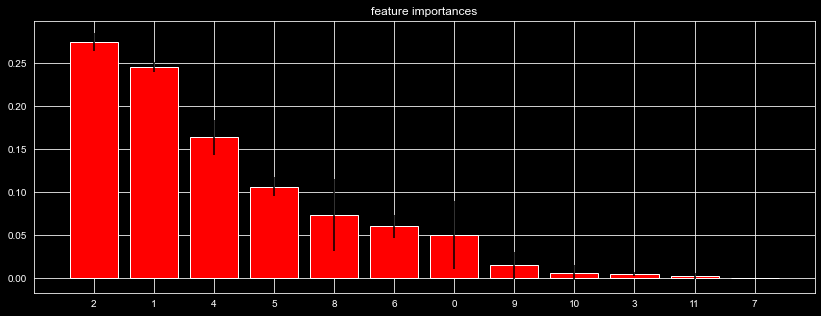

In [43]:
importances=forest.feature_importances_
std=np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices=np.argsort(importances)[::-1]  # índice é a importância das árvores ornada pelo maior valor

# print the feature ranking
print('Feature ranking')
df=pd.DataFrame()
for i, j in zip(x_train_n,forest.feature_importances_): # zip é pra arrumar as colunas com os valores
    aux=pd.DataFrame({'feature':i,'importance':j},index=[0])
    df=pd.concat([df,aux],axis=0)
    
print(df.sort_values('importance',ascending=False))

# plot the imputiry-based feature importances of the forest
plt.figure()
plt.title('feature importances')
plt.bar(range(x_train_n.shape[1]),importances[indices],color='r',yerr=std[indices],align='center')
plt.xticks(range(x_train_n.shape[1]),indices)
plt.xlim([-1,x_train_n.shape[1]])
plt.show()

# **Passo 7 Machine learning**

In [44]:
# foi escolhiadas as variáveis até a importância de 0.5 (decisão arbitrária)

cols_selected=['annual_premium','vintage','age','region_code','vehicle_damage','previously_insured','policy_sales_channel']

x_train=df5[cols_selected]
x_val=x_validation[cols_selected]
y_val=y_validation.copy()

## **7.1 Knn**

In [15]:
# model definition
knn_model=nh.KNeighborsClassifier(n_neighbors=7)      # aumentar os neighbors tende a melhorar o modelo

# model training
knn_model.fit(x_train,y_train)      # treinando com dado de treino

# predizer sobre dados que nunca viu = poder de generalização
# model prediction                  # ñ está medindo o poder de aprendizado pq ñ tem os dados de validação 
yhat_knn=knn_model.predict_proba(x_val)

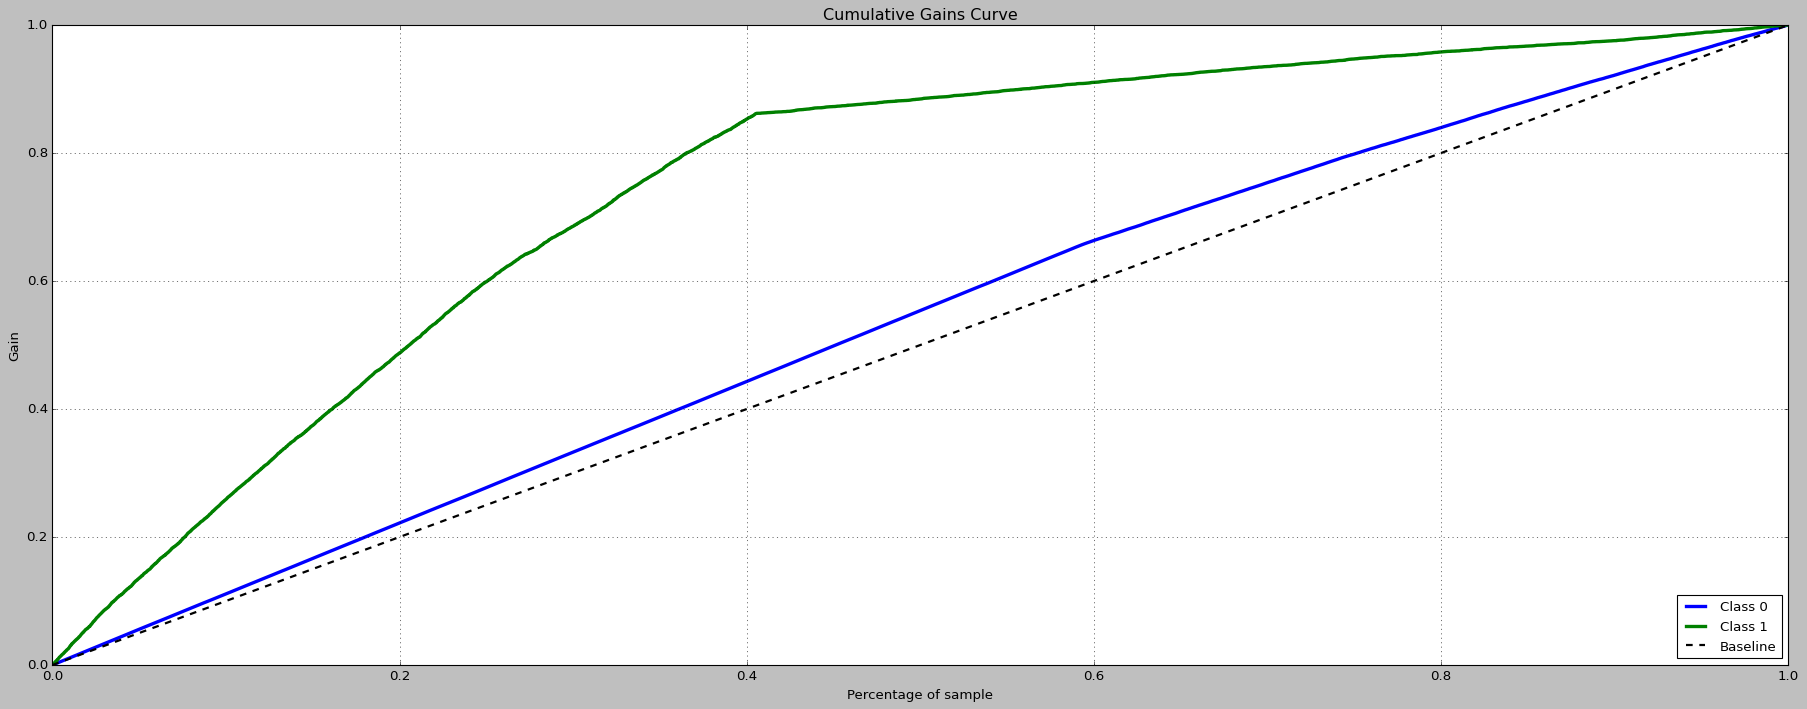

In [16]:
# accumulative gain  - curva acumulada, métrica de ordenação

sns.set_style("whitegrid")
plt.style.use("classic")
rcParams['figure.figsize'] = 28,10
skplt.metrics.plot_cumulative_gain(y_val,yhat_knn);# y_val é o y 'verdadeiro', se a pessoa tinha interesse ou não, e o cálculo de propensão p/ a pessoa feito pelo knn

    20% da lista ordenada = 50% das pessoas interessadas

In [ ]:
# pesquisar métrica de ordenação de lista

## **7.2 Logistic regression**

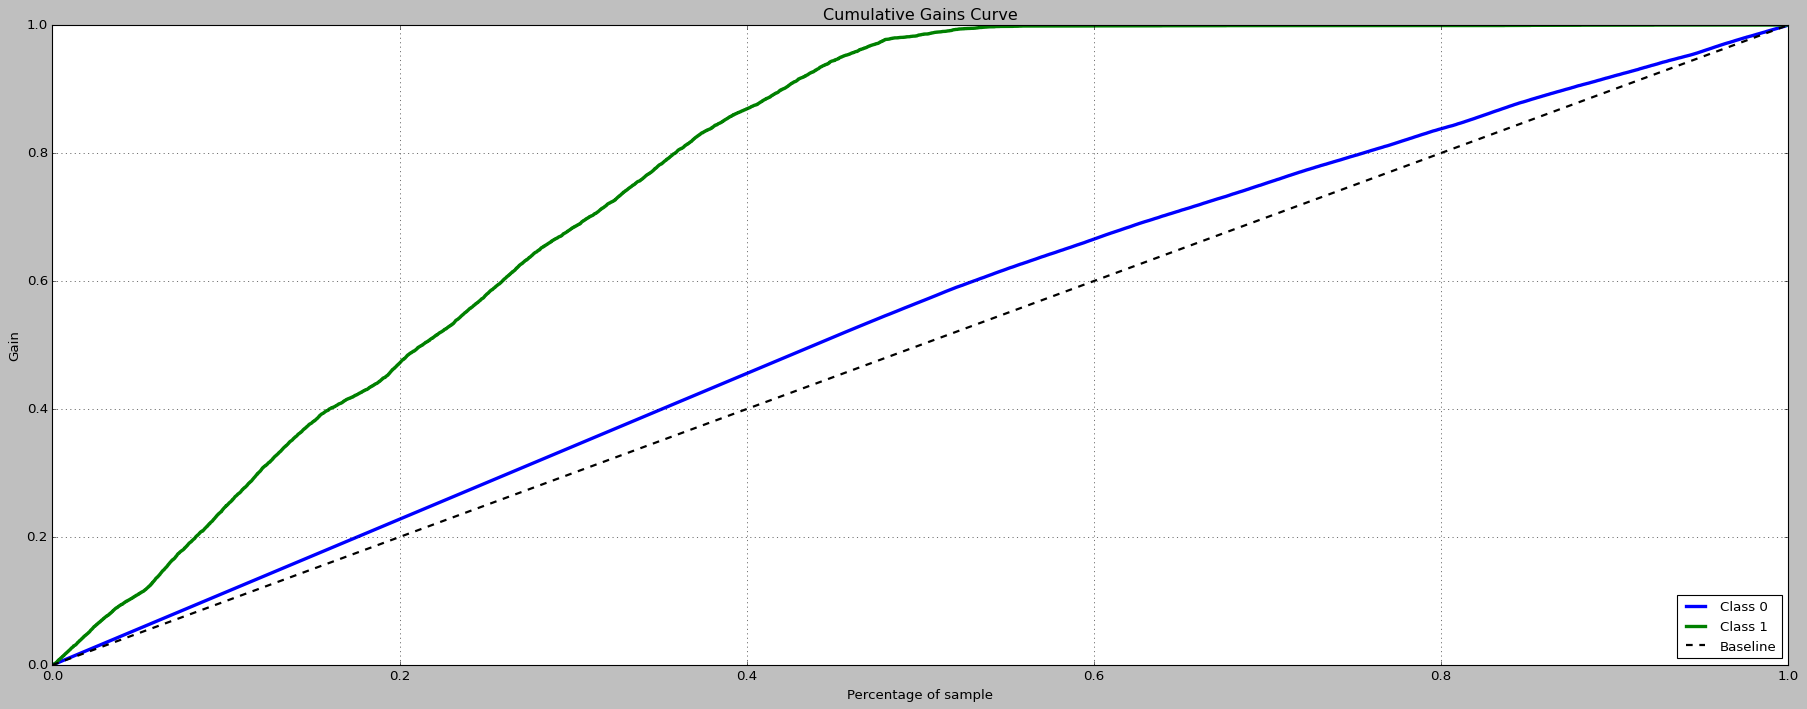

In [20]:
# model definition

lr_model=lm.LogisticRegression(random_state=42)

# model training
lr_model.fit(x_train,y_train)

# model prediction
yhat_lr=lr_model.predict_proba(x_val);

# accumulative gain
skplt.metrics.plot_cumulative_gain(y_val,yhat_lr);

## **Extra trees**

In [ ]:
# model definition
et=en.ExtraTreesClassifier(n_estimators=1000,n_jobs=-1,random_state=42)    # njobs-1 é pra usar os cores da minha máquina

# model fit
et.fit(x_train,y_train)

# model predict
yhat_et=et.predict_proba(x_val)